In [2]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import os
import json, glob
from intrinio_api import *
%matplotlib inline

In [2]:
# def request_and_store(ticker,quarter,statement,page,count):
#     params = dict(identifier=ticker,
#       statement=statement,
#       type='QTR',
#       date=quarter,
#       page_number=page)
    
#     fname = '_'.join(map(lambda x: str(x), params.values())) + '.json'
#     fpath = os.path.join('financials','requests',fname)
    
#     # Request
#     if not os.path.exists(fpath):
#         print(ticker, quarter, statement, page)
#         resp = requests.get('https://api.intrinio.com/financials/standardized', params=params, auth=('1f3ea4c3c63c5785750626ea97e9bc87', '63d202d4187ad187a26d452909ac16f9'))
#         dic = json.loads(resp.content)
#         stopticker = (int(dic['result_count']) == 0) & (statement=='income_statement')
#         count += 1
#     else:
#         try:
#             dic = json.load(open(fpath))
#             stopticker = (int(dic['result_count']) == 0) & (statement=='income_statement')
#         except Exception as e:
#             print(e, fpath)
    
#     total_pages = dic['total_pages']
    
#     # Store
#     dic2 = dict(dic, **params)
#     json.dump(dic2, open(fpath,'w'))
    
#     return total_pages, count, stopticker

# def get_financials(tickers, yearstart=2010, quarters = None, statements = ['income_statement','cash_flow_statement','calculations','balance_sheet']):
#     dics = []
#     count = 0
#     if quarters is None:
#         quarters = (pd.date_range(start=str(yearstart),end='2017-12-31',freq='QS')[::-1]).strftime('%Y-%m-%d')
#     for ticker in tickers:
#         stopticker = False
#         for quarter in quarters:
#             for statement in statements:
#                 page = 1
#                 total_pages = 1
#                 while page <= total_pages:                
#                     total_pages, count, stopticker = request_and_store(ticker,quarter,statement,page,count)
#                     page += 1
#                     if stopticker:
#                         print('stopped', ticker, quarter, statement)
#                         break
#                 if stopticker:
#                     break
#             if stopticker:
#                 break
#         if stopticker:
#             continue

#     return count

# def get_df(ticker):
#     dics = [json.load(open(f)) for f in glob.glob('financials/requests/{}_*.json'.format(ticker))]
#     if len(dics) == 0:
#         count = get_financials([ticker])
#         dics = [json.load(open(f)) for f in glob.glob('financials/requests/{}*.json'.format(ticker))]
#     df = pd.DataFrame(dics)
#     df = df[df.result_count>0]
#     df_t = df.data.apply(lambda x: pd.DataFrame(x).set_index('tag').iloc[:,0])
#     df_t['ticker'] = df.identifier
#     df_t['statement'] = df.statement
#     df_t['date'] = pd.to_datetime(df.date)
#     df_t = df_t.sort_values(['ticker','statement','date'])
#     df_t = pd.melt(df_t, id_vars=['ticker','statement','date'], var_name='tag', value_name='value').dropna()
#     df_t.value = pd.to_numeric(df_t.value, errors='coerce')
#     return df_t

In [3]:
available_files = !ls -ltS financials/requests | awk '{if($5 > 1000) print $9}'
available_tickers = np.unique([re.match('([A-Z]+)_.*', f).group(1) for f in available_files]); available_tickers

array(['AAN', 'AAOI', 'AAPL', 'ACIA', 'ACIW', 'ACLS', 'ACMR', 'ACXM',
       'ADBE', 'ADI', 'ADP', 'ADSK', 'AGYS', 'AL', 'ALRM', 'ALTR', 'AMAT',
       'AMBA', 'AMBR', 'AMD', 'AMKR', 'AMN', 'AMSWA', 'ANET', 'ANSS',
       'AOSL', 'APPF', 'APPN', 'APTI', 'AQ', 'ARRS', 'ASGN', 'ASUR',
       'ATEN', 'ATU', 'ATVI', 'AVGO', 'AVID', 'AXTI', 'AYR', 'AYX',
       'AZPN', 'BAND', 'BBSI', 'BCOV', 'BGSF', 'BHE', 'BKI', 'BL', 'BLKB',
       'BNFT', 'BOX', 'BRKS', 'CA', 'CACI', 'CAI', 'CAMP', 'CARB', 'CARG',
       'CARS', 'CCMP', 'CCRN', 'CDNS', 'CERN', 'CEVA', 'CLDR', 'CLGX',
       'CMTL', 'COMM', 'COUP', 'CPSI', 'CRAY', 'CREE', 'CRM', 'CRTO',
       'CRUS', 'CSCO', 'CSGS', 'CSLT', 'CSOD', 'CTS', 'CTSH', 'CTXS',
       'CVG', 'CVLT', 'CW', 'CY', 'DATA', 'DDD', 'DGII', 'DIOD', 'DMRC',
       'DOV', 'DSPG', 'DVMT', 'DWCH', 'DXC', 'EA', 'EBIX', 'EFII', 'EGAN',
       'EIGI', 'ELLI', 'ENPH', 'EPAM', 'EPAY', 'ERII', 'ETN', 'EVER',
       'EVTC', 'EXTN', 'EXTR', 'FB', 'FDS', 'FEYE', 'FFIV', 'FISV', '

In [4]:
len(available_tickers)

365

In [8]:
tickers_df = pd.read_csv('tickers.csv')
tickers_df = tickers_df.query("tech").sort_values('MarketCap', ascending=False)

In [8]:
tickers = tickers_df.Symbol[207:]
count = get_financials(tickers)

SMTC 2017-10-01 income_statement 1
SMTC 2017-10-01 cash_flow_statement 1
SMTC 2017-10-01 calculations 1
SMTC 2017-10-01 calculations 2
SMTC 2017-10-01 balance_sheet 1
SMTC 2017-07-01 income_statement 1
SMTC 2017-07-01 cash_flow_statement 1
SMTC 2017-07-01 calculations 1
SMTC 2017-07-01 calculations 2
SMTC 2017-07-01 balance_sheet 1
SMTC 2017-04-01 income_statement 1
SMTC 2017-04-01 cash_flow_statement 1
SMTC 2017-04-01 calculations 1
SMTC 2017-04-01 calculations 2
SMTC 2017-04-01 balance_sheet 1
SMTC 2017-01-01 income_statement 1
SMTC 2017-01-01 cash_flow_statement 1
SMTC 2017-01-01 calculations 1
SMTC 2017-01-01 calculations 2
SMTC 2017-01-01 balance_sheet 1
SMTC 2016-10-01 income_statement 1
SMTC 2016-10-01 cash_flow_statement 1
SMTC 2016-10-01 calculations 1
SMTC 2016-10-01 calculations 2
SMTC 2016-10-01 balance_sheet 1
SMTC 2016-07-01 income_statement 1
SMTC 2016-07-01 cash_flow_statement 1
SMTC 2016-07-01 calculations 1
SMTC 2016-07-01 calculations 2
SMTC 2016-07-01 balance_sheet 

CSOD 2013-07-01 calculations 1
CSOD 2013-07-01 calculations 2
CSOD 2013-07-01 balance_sheet 1
CSOD 2013-04-01 income_statement 1
CSOD 2013-04-01 cash_flow_statement 1
CSOD 2013-04-01 calculations 1
CSOD 2013-04-01 calculations 2
CSOD 2013-04-01 balance_sheet 1
CSOD 2013-01-01 income_statement 1
CSOD 2013-01-01 cash_flow_statement 1
CSOD 2013-01-01 calculations 1
CSOD 2013-01-01 calculations 2
CSOD 2013-01-01 balance_sheet 1
CSOD 2012-10-01 income_statement 1
CSOD 2012-10-01 cash_flow_statement 1
CSOD 2012-10-01 calculations 1
CSOD 2012-10-01 calculations 2
CSOD 2012-10-01 balance_sheet 1
CSOD 2012-07-01 income_statement 1
CSOD 2012-07-01 cash_flow_statement 1
CSOD 2012-07-01 calculations 1
CSOD 2012-07-01 calculations 2
CSOD 2012-07-01 balance_sheet 1
CSOD 2012-04-01 income_statement 1
CSOD 2012-04-01 cash_flow_statement 1
CSOD 2012-04-01 calculations 1
CSOD 2012-04-01 calculations 2
CSOD 2012-04-01 balance_sheet 1
CSOD 2012-01-01 income_statement 1
CSOD 2012-01-01 cash_flow_statement 

TRTN 2016-10-01 income_statement 1
TRTN 2016-10-01 cash_flow_statement 1
TRTN 2016-10-01 calculations 1
TRTN 2016-10-01 calculations 2
TRTN 2016-10-01 balance_sheet 1
TRTN 2016-07-01 income_statement 1
TRTN 2016-07-01 cash_flow_statement 1
TRTN 2016-07-01 calculations 1
TRTN 2016-07-01 calculations 2
TRTN 2016-07-01 balance_sheet 1
TRTN 2016-04-01 income_statement 1
TRTN 2016-04-01 cash_flow_statement 1
TRTN 2016-04-01 calculations 1
TRTN 2016-04-01 calculations 2
TRTN 2016-04-01 balance_sheet 1
TRTN 2016-01-01 income_statement 1
TRTN 2016-01-01 cash_flow_statement 1
TRTN 2016-01-01 calculations 1
TRTN 2016-01-01 calculations 2
TRTN 2016-01-01 balance_sheet 1
TRTN 2015-10-01 income_statement 1
TRTN 2015-10-01 cash_flow_statement 1
TRTN 2015-10-01 calculations 1
TRTN 2015-10-01 calculations 2
TRTN 2015-10-01 balance_sheet 1
TRTN 2015-07-01 income_statement 1
stopped TRTN 2015-07-01 income_statement
VRNT 2017-10-01 income_statement 1
VRNT 2017-10-01 cash_flow_statement 1
VRNT 2017-10-01 

CVLT 2014-04-01 calculations 1
CVLT 2014-04-01 calculations 2
CVLT 2014-04-01 balance_sheet 1
CVLT 2014-01-01 income_statement 1
CVLT 2014-01-01 cash_flow_statement 1
CVLT 2014-01-01 calculations 1
CVLT 2014-01-01 calculations 2
CVLT 2014-01-01 balance_sheet 1
CVLT 2013-10-01 income_statement 1
CVLT 2013-10-01 cash_flow_statement 1
CVLT 2013-10-01 calculations 1
CVLT 2013-10-01 calculations 2
CVLT 2013-10-01 balance_sheet 1
CVLT 2013-07-01 income_statement 1
CVLT 2013-07-01 cash_flow_statement 1
CVLT 2013-07-01 calculations 1
CVLT 2013-07-01 calculations 2
CVLT 2013-07-01 balance_sheet 1
CVLT 2013-04-01 income_statement 1
CVLT 2013-04-01 cash_flow_statement 1
CVLT 2013-04-01 calculations 1
CVLT 2013-04-01 calculations 2
CVLT 2013-04-01 balance_sheet 1
CVLT 2013-01-01 income_statement 1
CVLT 2013-01-01 cash_flow_statement 1
CVLT 2013-01-01 calculations 1
CVLT 2013-01-01 calculations 2
CVLT 2013-01-01 balance_sheet 1
CVLT 2012-10-01 income_statement 1
CVLT 2012-10-01 cash_flow_statement 

RXN 2015-07-01 cash_flow_statement 1
RXN 2015-07-01 calculations 1
RXN 2015-07-01 calculations 2
RXN 2015-07-01 balance_sheet 1
RXN 2015-04-01 income_statement 1
RXN 2015-04-01 cash_flow_statement 1
RXN 2015-04-01 calculations 1
RXN 2015-04-01 calculations 2
RXN 2015-04-01 balance_sheet 1
RXN 2015-01-01 income_statement 1
RXN 2015-01-01 cash_flow_statement 1
RXN 2015-01-01 calculations 1
RXN 2015-01-01 calculations 2
RXN 2015-01-01 balance_sheet 1
RXN 2014-10-01 income_statement 1
RXN 2014-10-01 cash_flow_statement 1
RXN 2014-10-01 calculations 1
RXN 2014-10-01 calculations 2
RXN 2014-10-01 balance_sheet 1
RXN 2014-07-01 income_statement 1
RXN 2014-07-01 cash_flow_statement 1
RXN 2014-07-01 calculations 1
RXN 2014-07-01 calculations 2
RXN 2014-07-01 balance_sheet 1
RXN 2014-04-01 income_statement 1
RXN 2014-04-01 cash_flow_statement 1
RXN 2014-04-01 calculations 1
RXN 2014-04-01 calculations 2
RXN 2014-04-01 balance_sheet 1
RXN 2014-01-01 income_statement 1
RXN 2014-01-01 cash_flow_sta

SWCH 2017-07-01 calculations 2
SWCH 2017-07-01 balance_sheet 1
SWCH 2017-04-01 income_statement 1
SWCH 2017-04-01 cash_flow_statement 1
SWCH 2017-04-01 calculations 1
SWCH 2017-04-01 calculations 2
SWCH 2017-04-01 balance_sheet 1
SWCH 2017-01-01 income_statement 1
SWCH 2017-01-01 cash_flow_statement 1
SWCH 2017-01-01 calculations 1
SWCH 2017-01-01 calculations 2
SWCH 2017-01-01 balance_sheet 1
SWCH 2016-10-01 income_statement 1
SWCH 2016-10-01 cash_flow_statement 1
SWCH 2016-10-01 calculations 1
SWCH 2016-10-01 calculations 2
SWCH 2016-10-01 balance_sheet 1
SWCH 2016-07-01 income_statement 1
stopped SWCH 2016-07-01 income_statement
SGMS 2017-10-01 income_statement 1
SGMS 2017-10-01 cash_flow_statement 1
SGMS 2017-10-01 calculations 1
SGMS 2017-10-01 calculations 2
SGMS 2017-10-01 balance_sheet 1
SGMS 2017-07-01 income_statement 1
SGMS 2017-07-01 cash_flow_statement 1
SGMS 2017-07-01 calculations 1
SGMS 2017-07-01 calculations 2
SGMS 2017-07-01 balance_sheet 1
SGMS 2017-04-01 income_sta

AMN 2015-10-01 calculations 2
AMN 2015-10-01 balance_sheet 1
AMN 2015-07-01 income_statement 1
AMN 2015-07-01 cash_flow_statement 1
AMN 2015-07-01 calculations 1
AMN 2015-07-01 calculations 2
AMN 2015-07-01 balance_sheet 1
AMN 2015-04-01 income_statement 1
AMN 2015-04-01 cash_flow_statement 1
AMN 2015-04-01 calculations 1
AMN 2015-04-01 calculations 2
AMN 2015-04-01 balance_sheet 1
AMN 2015-01-01 income_statement 1
AMN 2015-01-01 cash_flow_statement 1
AMN 2015-01-01 calculations 1
AMN 2015-01-01 calculations 2
AMN 2015-01-01 balance_sheet 1
AMN 2014-10-01 income_statement 1
AMN 2014-10-01 cash_flow_statement 1
AMN 2014-10-01 calculations 1
AMN 2014-10-01 calculations 2
AMN 2014-10-01 balance_sheet 1
AMN 2014-07-01 income_statement 1
AMN 2014-07-01 cash_flow_statement 1
AMN 2014-07-01 calculations 1
AMN 2014-07-01 calculations 2
AMN 2014-07-01 balance_sheet 1
AMN 2014-04-01 income_statement 1
AMN 2014-04-01 cash_flow_statement 1
AMN 2014-04-01 calculations 1
AMN 2014-04-01 calculations 

FIVN 2014-07-01 calculations 1
FIVN 2014-07-01 calculations 2
FIVN 2014-07-01 balance_sheet 1
FIVN 2014-04-01 income_statement 1
FIVN 2014-04-01 cash_flow_statement 1
FIVN 2014-04-01 calculations 1
FIVN 2014-04-01 calculations 2
FIVN 2014-04-01 balance_sheet 1
FIVN 2014-01-01 income_statement 1
FIVN 2014-01-01 cash_flow_statement 1
FIVN 2014-01-01 calculations 1
FIVN 2014-01-01 calculations 2
FIVN 2014-01-01 balance_sheet 1
FIVN 2013-10-01 income_statement 1
FIVN 2013-10-01 cash_flow_statement 1
FIVN 2013-10-01 calculations 1
FIVN 2013-10-01 calculations 2
FIVN 2013-10-01 balance_sheet 1
FIVN 2013-07-01 income_statement 1
FIVN 2013-07-01 cash_flow_statement 1
FIVN 2013-07-01 calculations 1
FIVN 2013-07-01 calculations 2
FIVN 2013-07-01 balance_sheet 1
FIVN 2013-04-01 income_statement 1
FIVN 2013-04-01 cash_flow_statement 1
FIVN 2013-04-01 calculations 1
FIVN 2013-04-01 calculations 2
FIVN 2013-04-01 balance_sheet 1
FIVN 2013-01-01 income_statement 1
stopped FIVN 2013-01-01 income_state

QTWO 2017-01-01 balance_sheet 1
QTWO 2016-10-01 income_statement 1
QTWO 2016-10-01 cash_flow_statement 1
QTWO 2016-10-01 calculations 1
QTWO 2016-10-01 calculations 2
QTWO 2016-10-01 balance_sheet 1
QTWO 2016-07-01 income_statement 1
QTWO 2016-07-01 cash_flow_statement 1
QTWO 2016-07-01 calculations 1
QTWO 2016-07-01 calculations 2
QTWO 2016-07-01 balance_sheet 1
QTWO 2016-04-01 income_statement 1
QTWO 2016-04-01 cash_flow_statement 1
QTWO 2016-04-01 calculations 1
QTWO 2016-04-01 calculations 2
QTWO 2016-04-01 balance_sheet 1
QTWO 2016-01-01 income_statement 1
QTWO 2016-01-01 cash_flow_statement 1
QTWO 2016-01-01 calculations 1
QTWO 2016-01-01 calculations 2
QTWO 2016-01-01 balance_sheet 1
QTWO 2015-10-01 income_statement 1
QTWO 2015-10-01 cash_flow_statement 1
QTWO 2015-10-01 calculations 1
QTWO 2015-10-01 calculations 2
QTWO 2015-10-01 balance_sheet 1
QTWO 2015-07-01 income_statement 1
QTWO 2015-07-01 cash_flow_statement 1
QTWO 2015-07-01 calculations 1
QTWO 2015-07-01 calculations 

ALRM 2017-07-01 balance_sheet 1
ALRM 2017-04-01 income_statement 1
ALRM 2017-04-01 cash_flow_statement 1
ALRM 2017-04-01 calculations 1
ALRM 2017-04-01 calculations 2
ALRM 2017-04-01 balance_sheet 1
ALRM 2017-01-01 income_statement 1
ALRM 2017-01-01 cash_flow_statement 1
ALRM 2017-01-01 calculations 1
ALRM 2017-01-01 calculations 2
ALRM 2017-01-01 balance_sheet 1
ALRM 2016-10-01 income_statement 1
ALRM 2016-10-01 cash_flow_statement 1
ALRM 2016-10-01 calculations 1
ALRM 2016-10-01 calculations 2
ALRM 2016-10-01 balance_sheet 1
ALRM 2016-07-01 income_statement 1
ALRM 2016-07-01 cash_flow_statement 1
ALRM 2016-07-01 calculations 1
ALRM 2016-07-01 calculations 2
ALRM 2016-07-01 balance_sheet 1
ALRM 2016-04-01 income_statement 1
ALRM 2016-04-01 cash_flow_statement 1
ALRM 2016-04-01 calculations 1
ALRM 2016-04-01 calculations 2
ALRM 2016-04-01 balance_sheet 1
ALRM 2016-01-01 income_statement 1
ALRM 2016-01-01 cash_flow_statement 1
ALRM 2016-01-01 calculations 1
ALRM 2016-01-01 calculations 

VIAV 2016-10-01 cash_flow_statement 1
VIAV 2016-10-01 calculations 1
VIAV 2016-10-01 calculations 2
VIAV 2016-10-01 balance_sheet 1
VIAV 2016-07-01 income_statement 1
VIAV 2016-07-01 cash_flow_statement 1
VIAV 2016-07-01 calculations 1
VIAV 2016-07-01 calculations 2
VIAV 2016-07-01 balance_sheet 1
VIAV 2016-04-01 income_statement 1
VIAV 2016-04-01 cash_flow_statement 1
VIAV 2016-04-01 calculations 1
VIAV 2016-04-01 calculations 2
VIAV 2016-04-01 balance_sheet 1
VIAV 2016-01-01 income_statement 1
VIAV 2016-01-01 cash_flow_statement 1
VIAV 2016-01-01 calculations 1
VIAV 2016-01-01 calculations 2
VIAV 2016-01-01 balance_sheet 1
VIAV 2015-10-01 income_statement 1
VIAV 2015-10-01 cash_flow_statement 1
VIAV 2015-10-01 calculations 1
VIAV 2015-10-01 calculations 2
VIAV 2015-10-01 balance_sheet 1
VIAV 2015-07-01 income_statement 1
VIAV 2015-07-01 cash_flow_statement 1
VIAV 2015-07-01 calculations 1
VIAV 2015-07-01 calculations 2
VIAV 2015-07-01 balance_sheet 1
VIAV 2015-04-01 income_statement 

GRPN 2012-07-01 calculations 1
GRPN 2012-07-01 calculations 2
GRPN 2012-07-01 balance_sheet 1
GRPN 2012-04-01 income_statement 1
GRPN 2012-04-01 cash_flow_statement 1
GRPN 2012-04-01 calculations 1
GRPN 2012-04-01 calculations 2
GRPN 2012-04-01 balance_sheet 1
GRPN 2012-01-01 income_statement 1
GRPN 2012-01-01 cash_flow_statement 1
GRPN 2012-01-01 calculations 1
GRPN 2012-01-01 calculations 2
GRPN 2012-01-01 balance_sheet 1
GRPN 2011-10-01 income_statement 1
GRPN 2011-10-01 cash_flow_statement 1
GRPN 2011-10-01 calculations 1
GRPN 2011-10-01 calculations 2
GRPN 2011-10-01 balance_sheet 1
GRPN 2011-07-01 income_statement 1
GRPN 2011-07-01 cash_flow_statement 1
GRPN 2011-07-01 calculations 1
GRPN 2011-07-01 calculations 2
GRPN 2011-07-01 balance_sheet 1
GRPN 2011-04-01 income_statement 1
GRPN 2011-04-01 cash_flow_statement 1
GRPN 2011-04-01 calculations 1
GRPN 2011-04-01 calculations 2
GRPN 2011-04-01 balance_sheet 1
GRPN 2011-01-01 income_statement 1
stopped GRPN 2011-01-01 income_state

EBIX 2015-01-01 cash_flow_statement 1
EBIX 2015-01-01 calculations 1
EBIX 2015-01-01 calculations 2
EBIX 2015-01-01 balance_sheet 1
EBIX 2014-10-01 income_statement 1
EBIX 2014-10-01 cash_flow_statement 1
EBIX 2014-10-01 calculations 1
EBIX 2014-10-01 calculations 2
EBIX 2014-10-01 balance_sheet 1
EBIX 2014-07-01 income_statement 1
EBIX 2014-07-01 cash_flow_statement 1
EBIX 2014-07-01 calculations 1
EBIX 2014-07-01 calculations 2
EBIX 2014-07-01 balance_sheet 1
EBIX 2014-04-01 income_statement 1
EBIX 2014-04-01 cash_flow_statement 1
EBIX 2014-04-01 calculations 1
EBIX 2014-04-01 calculations 2
EBIX 2014-04-01 balance_sheet 1
EBIX 2014-01-01 income_statement 1
EBIX 2014-01-01 cash_flow_statement 1
EBIX 2014-01-01 calculations 1
EBIX 2014-01-01 calculations 2
EBIX 2014-01-01 balance_sheet 1
EBIX 2013-10-01 income_statement 1
EBIX 2013-10-01 cash_flow_statement 1
EBIX 2013-10-01 calculations 1
EBIX 2013-10-01 calculations 2
EBIX 2013-10-01 balance_sheet 1
EBIX 2013-07-01 income_statement 

DDD 2012-07-01 balance_sheet 1
DDD 2012-04-01 income_statement 1
DDD 2012-04-01 cash_flow_statement 1
DDD 2012-04-01 calculations 1
DDD 2012-04-01 calculations 2
DDD 2012-04-01 balance_sheet 1
DDD 2012-01-01 income_statement 1
DDD 2012-01-01 cash_flow_statement 1
DDD 2012-01-01 calculations 1
DDD 2012-01-01 calculations 2
DDD 2012-01-01 balance_sheet 1
DDD 2011-10-01 income_statement 1
DDD 2011-10-01 cash_flow_statement 1
DDD 2011-10-01 calculations 1
DDD 2011-10-01 calculations 2
DDD 2011-10-01 balance_sheet 1
DDD 2011-07-01 income_statement 1
DDD 2011-07-01 cash_flow_statement 1
DDD 2011-07-01 calculations 1
DDD 2011-07-01 calculations 2
DDD 2011-07-01 balance_sheet 1
DDD 2011-04-01 income_statement 1
DDD 2011-04-01 cash_flow_statement 1
DDD 2011-04-01 calculations 1
DDD 2011-04-01 calculations 2
DDD 2011-04-01 balance_sheet 1
DDD 2011-01-01 income_statement 1
DDD 2011-01-01 cash_flow_statement 1
DDD 2011-01-01 calculations 1
DDD 2011-01-01 calculations 2
DDD 2011-01-01 balance_sheet

CVG 2015-01-01 calculations 1
CVG 2015-01-01 calculations 2
CVG 2015-01-01 balance_sheet 1
CVG 2014-10-01 income_statement 1
CVG 2014-10-01 cash_flow_statement 1
CVG 2014-10-01 calculations 1
CVG 2014-10-01 calculations 2
CVG 2014-10-01 balance_sheet 1
CVG 2014-07-01 income_statement 1
CVG 2014-07-01 cash_flow_statement 1
CVG 2014-07-01 calculations 1
CVG 2014-07-01 calculations 2
CVG 2014-07-01 balance_sheet 1
CVG 2014-04-01 income_statement 1
CVG 2014-04-01 cash_flow_statement 1
CVG 2014-04-01 calculations 1
CVG 2014-04-01 calculations 2
CVG 2014-04-01 balance_sheet 1
CVG 2014-01-01 income_statement 1
CVG 2014-01-01 cash_flow_statement 1
CVG 2014-01-01 calculations 1
CVG 2014-01-01 calculations 2
CVG 2014-01-01 balance_sheet 1
CVG 2013-10-01 income_statement 1
CVG 2013-10-01 cash_flow_statement 1
CVG 2013-10-01 calculations 1
CVG 2013-10-01 calculations 2
CVG 2013-10-01 balance_sheet 1
CVG 2013-07-01 income_statement 1
CVG 2013-07-01 cash_flow_statement 1
CVG 2013-07-01 calculations 

POWI 2014-10-01 balance_sheet 1
POWI 2014-07-01 income_statement 1
POWI 2014-07-01 cash_flow_statement 1
POWI 2014-07-01 calculations 1
POWI 2014-07-01 calculations 2
POWI 2014-07-01 balance_sheet 1
POWI 2014-04-01 income_statement 1
POWI 2014-04-01 cash_flow_statement 1
POWI 2014-04-01 calculations 1
POWI 2014-04-01 calculations 2
POWI 2014-04-01 balance_sheet 1
POWI 2014-01-01 income_statement 1
POWI 2014-01-01 cash_flow_statement 1
POWI 2014-01-01 calculations 1
POWI 2014-01-01 calculations 2
POWI 2014-01-01 balance_sheet 1
POWI 2013-10-01 income_statement 1
POWI 2013-10-01 cash_flow_statement 1
POWI 2013-10-01 calculations 1
POWI 2013-10-01 calculations 2
POWI 2013-10-01 balance_sheet 1
POWI 2013-07-01 income_statement 1
POWI 2013-07-01 cash_flow_statement 1
POWI 2013-07-01 calculations 1
POWI 2013-07-01 calculations 2
POWI 2013-07-01 balance_sheet 1
POWI 2013-04-01 income_statement 1
POWI 2013-04-01 cash_flow_statement 1
POWI 2013-04-01 calculations 1
POWI 2013-04-01 calculations 

BRKS 2012-01-01 calculations 1
BRKS 2012-01-01 calculations 2
BRKS 2012-01-01 balance_sheet 1
BRKS 2011-10-01 income_statement 1
BRKS 2011-10-01 cash_flow_statement 1
BRKS 2011-10-01 calculations 1
BRKS 2011-10-01 calculations 2
BRKS 2011-10-01 balance_sheet 1
BRKS 2011-07-01 income_statement 1
BRKS 2011-07-01 cash_flow_statement 1
BRKS 2011-07-01 calculations 1
BRKS 2011-07-01 calculations 2
BRKS 2011-07-01 balance_sheet 1
BRKS 2011-04-01 income_statement 1
BRKS 2011-04-01 cash_flow_statement 1
BRKS 2011-04-01 calculations 1
BRKS 2011-04-01 calculations 2
BRKS 2011-04-01 balance_sheet 1
BRKS 2011-01-01 income_statement 1
BRKS 2011-01-01 cash_flow_statement 1
BRKS 2011-01-01 calculations 1
BRKS 2011-01-01 calculations 2
BRKS 2011-01-01 balance_sheet 1
BRKS 2010-10-01 income_statement 1
BRKS 2010-10-01 cash_flow_statement 1
BRKS 2010-10-01 calculations 1
BRKS 2010-10-01 calculations 2
BRKS 2010-10-01 balance_sheet 1
BRKS 2010-07-01 income_statement 1
BRKS 2010-07-01 cash_flow_statement 

FLOW 2015-01-01 income_statement 1
FLOW 2015-01-01 cash_flow_statement 1
FLOW 2015-01-01 calculations 1
FLOW 2015-01-01 calculations 2
FLOW 2015-01-01 balance_sheet 1
FLOW 2014-10-01 income_statement 1
FLOW 2014-10-01 cash_flow_statement 1
FLOW 2014-10-01 calculations 1
FLOW 2014-10-01 calculations 2
FLOW 2014-10-01 balance_sheet 1
FLOW 2014-07-01 income_statement 1
stopped FLOW 2014-07-01 income_statement
NTCT 2017-10-01 income_statement 1
NTCT 2017-10-01 cash_flow_statement 1
NTCT 2017-10-01 calculations 1
NTCT 2017-10-01 calculations 2
NTCT 2017-10-01 balance_sheet 1
NTCT 2017-07-01 income_statement 1
NTCT 2017-07-01 cash_flow_statement 1
NTCT 2017-07-01 calculations 1
NTCT 2017-07-01 calculations 2
NTCT 2017-07-01 balance_sheet 1
NTCT 2017-04-01 income_statement 1
NTCT 2017-04-01 cash_flow_statement 1
NTCT 2017-04-01 calculations 1
NTCT 2017-04-01 calculations 2
NTCT 2017-04-01 balance_sheet 1
NTCT 2017-01-01 income_statement 1
NTCT 2017-01-01 cash_flow_statement 1
NTCT 2017-01-01 

VRNS 2013-10-01 cash_flow_statement 1
VRNS 2013-10-01 calculations 1
VRNS 2013-10-01 calculations 2
VRNS 2013-10-01 balance_sheet 1
VRNS 2013-07-01 income_statement 1
VRNS 2013-07-01 cash_flow_statement 1
VRNS 2013-07-01 calculations 1
VRNS 2013-07-01 calculations 2
VRNS 2013-07-01 balance_sheet 1
VRNS 2013-04-01 income_statement 1
VRNS 2013-04-01 cash_flow_statement 1
VRNS 2013-04-01 calculations 1
VRNS 2013-04-01 calculations 2
VRNS 2013-04-01 balance_sheet 1
VRNS 2013-01-01 income_statement 1
stopped VRNS 2013-01-01 income_statement
AMKR 2017-10-01 income_statement 1
AMKR 2017-10-01 cash_flow_statement 1
AMKR 2017-10-01 calculations 1
AMKR 2017-10-01 calculations 2
AMKR 2017-10-01 balance_sheet 1
AMKR 2017-07-01 income_statement 1
AMKR 2017-07-01 cash_flow_statement 1
AMKR 2017-07-01 calculations 1
AMKR 2017-07-01 calculations 2
AMKR 2017-07-01 balance_sheet 1
AMKR 2017-04-01 income_statement 1
AMKR 2017-04-01 cash_flow_statement 1
AMKR 2017-04-01 calculations 1
AMKR 2017-04-01 calc

CRTO 2017-07-01 balance_sheet 1
CRTO 2017-04-01 income_statement 1
CRTO 2017-04-01 cash_flow_statement 1
CRTO 2017-04-01 calculations 1
CRTO 2017-04-01 calculations 2
CRTO 2017-04-01 balance_sheet 1
CRTO 2017-01-01 income_statement 1
CRTO 2017-01-01 cash_flow_statement 1
CRTO 2017-01-01 calculations 1
CRTO 2017-01-01 calculations 2
CRTO 2017-01-01 balance_sheet 1
CRTO 2016-10-01 income_statement 1
CRTO 2016-10-01 cash_flow_statement 1
CRTO 2016-10-01 calculations 1
CRTO 2016-10-01 calculations 2
CRTO 2016-10-01 balance_sheet 1
CRTO 2016-07-01 income_statement 1
CRTO 2016-07-01 cash_flow_statement 1
CRTO 2016-07-01 calculations 1
CRTO 2016-07-01 calculations 2
CRTO 2016-07-01 balance_sheet 1
CRTO 2016-04-01 income_statement 1
CRTO 2016-04-01 cash_flow_statement 1
CRTO 2016-04-01 calculations 1
CRTO 2016-04-01 calculations 2
CRTO 2016-04-01 balance_sheet 1
CRTO 2016-01-01 income_statement 1
CRTO 2016-01-01 cash_flow_statement 1
CRTO 2016-01-01 calculations 1
CRTO 2016-01-01 calculations 

VRTU 2015-01-01 cash_flow_statement 1
VRTU 2015-01-01 calculations 1
VRTU 2015-01-01 calculations 2
VRTU 2015-01-01 balance_sheet 1
VRTU 2014-10-01 income_statement 1
VRTU 2014-10-01 cash_flow_statement 1
VRTU 2014-10-01 calculations 1
VRTU 2014-10-01 calculations 2
VRTU 2014-10-01 balance_sheet 1
VRTU 2014-07-01 income_statement 1
VRTU 2014-07-01 cash_flow_statement 1
VRTU 2014-07-01 calculations 1
VRTU 2014-07-01 calculations 2
VRTU 2014-07-01 balance_sheet 1
VRTU 2014-04-01 income_statement 1
VRTU 2014-04-01 cash_flow_statement 1
VRTU 2014-04-01 calculations 1
VRTU 2014-04-01 calculations 2
VRTU 2014-04-01 balance_sheet 1
VRTU 2014-01-01 income_statement 1
VRTU 2014-01-01 cash_flow_statement 1
VRTU 2014-01-01 calculations 1
VRTU 2014-01-01 calculations 2
VRTU 2014-01-01 balance_sheet 1
VRTU 2013-10-01 income_statement 1
VRTU 2013-10-01 cash_flow_statement 1
VRTU 2013-10-01 calculations 1
VRTU 2013-10-01 calculations 2
VRTU 2013-10-01 balance_sheet 1
VRTU 2013-07-01 income_statement 

SPSC 2016-10-01 calculations 2
SPSC 2016-10-01 balance_sheet 1
SPSC 2016-07-01 income_statement 1
SPSC 2016-07-01 cash_flow_statement 1
SPSC 2016-07-01 calculations 1
SPSC 2016-07-01 calculations 2
SPSC 2016-07-01 balance_sheet 1
SPSC 2016-04-01 income_statement 1
SPSC 2016-04-01 cash_flow_statement 1
SPSC 2016-04-01 calculations 1
SPSC 2016-04-01 calculations 2
SPSC 2016-04-01 balance_sheet 1
SPSC 2016-01-01 income_statement 1
SPSC 2016-01-01 cash_flow_statement 1
SPSC 2016-01-01 calculations 1
SPSC 2016-01-01 calculations 2
SPSC 2016-01-01 balance_sheet 1
SPSC 2015-10-01 income_statement 1
SPSC 2015-10-01 cash_flow_statement 1
SPSC 2015-10-01 calculations 1
SPSC 2015-10-01 calculations 2
SPSC 2015-10-01 balance_sheet 1
SPSC 2015-07-01 income_statement 1
SPSC 2015-07-01 cash_flow_statement 1
SPSC 2015-07-01 calculations 1
SPSC 2015-07-01 calculations 2
SPSC 2015-07-01 balance_sheet 1
SPSC 2015-04-01 income_statement 1
SPSC 2015-04-01 cash_flow_statement 1
SPSC 2015-04-01 calculations 

AYR 2011-10-01 calculations 1
AYR 2011-10-01 calculations 2
AYR 2011-10-01 balance_sheet 1
AYR 2011-07-01 income_statement 1
AYR 2011-07-01 cash_flow_statement 1
AYR 2011-07-01 calculations 1
AYR 2011-07-01 calculations 2
AYR 2011-07-01 balance_sheet 1
AYR 2011-04-01 income_statement 1
AYR 2011-04-01 cash_flow_statement 1
AYR 2011-04-01 calculations 1
AYR 2011-04-01 calculations 2
AYR 2011-04-01 balance_sheet 1
AYR 2011-01-01 income_statement 1
AYR 2011-01-01 cash_flow_statement 1
AYR 2011-01-01 calculations 1
AYR 2011-01-01 calculations 2
AYR 2011-01-01 balance_sheet 1
AYR 2010-10-01 income_statement 1
AYR 2010-10-01 cash_flow_statement 1
AYR 2010-10-01 calculations 1
AYR 2010-10-01 calculations 2
AYR 2010-10-01 balance_sheet 1
AYR 2010-07-01 income_statement 1
AYR 2010-07-01 cash_flow_statement 1
AYR 2010-07-01 calculations 1
AYR 2010-07-01 calculations 2
AYR 2010-07-01 balance_sheet 1
AYR 2010-04-01 income_statement 1
stopped AYR 2010-04-01 income_statement
APTI 2017-10-01 income_st

IMPV 2017-01-01 calculations 1
IMPV 2017-01-01 calculations 2
IMPV 2017-01-01 balance_sheet 1
IMPV 2016-10-01 income_statement 1
IMPV 2016-10-01 cash_flow_statement 1
IMPV 2016-10-01 calculations 1
IMPV 2016-10-01 calculations 2
IMPV 2016-10-01 balance_sheet 1
IMPV 2016-07-01 income_statement 1
IMPV 2016-07-01 cash_flow_statement 1
IMPV 2016-07-01 calculations 1
IMPV 2016-07-01 calculations 2
IMPV 2016-07-01 balance_sheet 1
IMPV 2016-04-01 income_statement 1
IMPV 2016-04-01 cash_flow_statement 1
IMPV 2016-04-01 calculations 1
IMPV 2016-04-01 calculations 2
IMPV 2016-04-01 balance_sheet 1
IMPV 2016-01-01 income_statement 1
IMPV 2016-01-01 cash_flow_statement 1
IMPV 2016-01-01 calculations 1
IMPV 2016-01-01 calculations 2
IMPV 2016-01-01 balance_sheet 1
IMPV 2015-10-01 income_statement 1
IMPV 2015-10-01 cash_flow_statement 1
IMPV 2015-10-01 calculations 1
IMPV 2015-10-01 calculations 2
IMPV 2015-10-01 balance_sheet 1
IMPV 2015-07-01 income_statement 1
IMPV 2015-07-01 cash_flow_statement 

OCLR 2011-07-01 cash_flow_statement 1
OCLR 2011-07-01 calculations 1
OCLR 2011-07-01 calculations 2
OCLR 2011-07-01 balance_sheet 1
OCLR 2011-04-01 income_statement 1
OCLR 2011-04-01 cash_flow_statement 1
OCLR 2011-04-01 calculations 1
OCLR 2011-04-01 calculations 2
OCLR 2011-04-01 balance_sheet 1
OCLR 2011-01-01 income_statement 1
OCLR 2011-01-01 cash_flow_statement 1
OCLR 2011-01-01 calculations 1
OCLR 2011-01-01 calculations 2
OCLR 2011-01-01 balance_sheet 1
OCLR 2010-10-01 income_statement 1
stopped OCLR 2010-10-01 income_statement
SYNA 2017-10-01 income_statement 1
SYNA 2017-10-01 cash_flow_statement 1
SYNA 2017-10-01 calculations 1
SYNA 2017-10-01 calculations 2
SYNA 2017-10-01 balance_sheet 1
SYNA 2017-07-01 income_statement 1
SYNA 2017-07-01 cash_flow_statement 1
SYNA 2017-07-01 calculations 1
SYNA 2017-07-01 calculations 2
SYNA 2017-07-01 balance_sheet 1
SYNA 2017-04-01 income_statement 1
SYNA 2017-04-01 cash_flow_statement 1
SYNA 2017-04-01 calculations 1
SYNA 2017-04-01 calc

LPSN 2014-07-01 income_statement 1
LPSN 2014-07-01 cash_flow_statement 1
LPSN 2014-07-01 calculations 1
LPSN 2014-07-01 calculations 2
LPSN 2014-07-01 balance_sheet 1
LPSN 2014-04-01 income_statement 1
LPSN 2014-04-01 cash_flow_statement 1
LPSN 2014-04-01 calculations 1
LPSN 2014-04-01 calculations 2
LPSN 2014-04-01 balance_sheet 1
LPSN 2014-01-01 income_statement 1
LPSN 2014-01-01 cash_flow_statement 1
LPSN 2014-01-01 calculations 1
LPSN 2014-01-01 calculations 2
LPSN 2014-01-01 balance_sheet 1
LPSN 2013-10-01 income_statement 1
LPSN 2013-10-01 cash_flow_statement 1
LPSN 2013-10-01 calculations 1
LPSN 2013-10-01 calculations 2
LPSN 2013-10-01 balance_sheet 1
LPSN 2013-07-01 income_statement 1
LPSN 2013-07-01 cash_flow_statement 1
LPSN 2013-07-01 calculations 1
LPSN 2013-07-01 calculations 2
LPSN 2013-07-01 balance_sheet 1
LPSN 2013-04-01 income_statement 1
LPSN 2013-04-01 cash_flow_statement 1
LPSN 2013-04-01 calculations 1
LPSN 2013-04-01 calculations 2
LPSN 2013-04-01 balance_sheet 

IPHI 2017-07-01 calculations 2
IPHI 2017-07-01 balance_sheet 1
IPHI 2017-04-01 income_statement 1
IPHI 2017-04-01 cash_flow_statement 1
IPHI 2017-04-01 calculations 1
IPHI 2017-04-01 calculations 2
IPHI 2017-04-01 balance_sheet 1
IPHI 2017-01-01 income_statement 1
IPHI 2017-01-01 cash_flow_statement 1
IPHI 2017-01-01 calculations 1
IPHI 2017-01-01 calculations 2
IPHI 2017-01-01 balance_sheet 1
IPHI 2016-10-01 income_statement 1
IPHI 2016-10-01 cash_flow_statement 1
IPHI 2016-10-01 calculations 1
IPHI 2016-10-01 calculations 2
IPHI 2016-10-01 balance_sheet 1
IPHI 2016-07-01 income_statement 1
IPHI 2016-07-01 cash_flow_statement 1
IPHI 2016-07-01 calculations 1
IPHI 2016-07-01 calculations 2
IPHI 2016-07-01 balance_sheet 1
IPHI 2016-04-01 income_statement 1
IPHI 2016-04-01 cash_flow_statement 1
IPHI 2016-04-01 calculations 1
IPHI 2016-04-01 calculations 2
IPHI 2016-04-01 balance_sheet 1
IPHI 2016-01-01 income_statement 1
IPHI 2016-01-01 cash_flow_statement 1
IPHI 2016-01-01 calculations 

MTSI 2012-10-01 calculations 1
MTSI 2012-10-01 calculations 2
MTSI 2012-10-01 balance_sheet 1
MTSI 2012-07-01 income_statement 1
MTSI 2012-07-01 cash_flow_statement 1
MTSI 2012-07-01 calculations 1
MTSI 2012-07-01 calculations 2
MTSI 2012-07-01 balance_sheet 1
MTSI 2012-04-01 income_statement 1
MTSI 2012-04-01 cash_flow_statement 1
MTSI 2012-04-01 calculations 1
MTSI 2012-04-01 calculations 2
MTSI 2012-04-01 balance_sheet 1
MTSI 2012-01-01 income_statement 1
MTSI 2012-01-01 cash_flow_statement 1
MTSI 2012-01-01 calculations 1
MTSI 2012-01-01 calculations 2
MTSI 2012-01-01 balance_sheet 1
MTSI 2011-10-01 income_statement 1
MTSI 2011-10-01 cash_flow_statement 1
MTSI 2011-10-01 calculations 1
MTSI 2011-10-01 calculations 2
MTSI 2011-10-01 balance_sheet 1
MTSI 2011-07-01 income_statement 1
MTSI 2011-07-01 cash_flow_statement 1
MTSI 2011-07-01 calculations 1
MTSI 2011-07-01 calculations 2
MTSI 2011-07-01 balance_sheet 1
MTSI 2011-04-01 income_statement 1
MTSI 2011-04-01 cash_flow_statement 

SPXC 2013-01-01 calculations 1
SPXC 2013-01-01 calculations 2
SPXC 2013-01-01 balance_sheet 1
SPXC 2012-10-01 income_statement 1
SPXC 2012-10-01 cash_flow_statement 1
SPXC 2012-10-01 calculations 1
SPXC 2012-10-01 calculations 2
SPXC 2012-10-01 balance_sheet 1
SPXC 2012-07-01 income_statement 1
SPXC 2012-07-01 cash_flow_statement 1
SPXC 2012-07-01 calculations 1
SPXC 2012-07-01 calculations 2
SPXC 2012-07-01 balance_sheet 1
SPXC 2012-04-01 income_statement 1
SPXC 2012-04-01 cash_flow_statement 1
SPXC 2012-04-01 calculations 1
SPXC 2012-04-01 calculations 2
SPXC 2012-04-01 balance_sheet 1
SPXC 2012-01-01 income_statement 1
SPXC 2012-01-01 cash_flow_statement 1
SPXC 2012-01-01 calculations 1
SPXC 2012-01-01 calculations 2
SPXC 2012-01-01 balance_sheet 1
SPXC 2011-10-01 income_statement 1
SPXC 2011-10-01 cash_flow_statement 1
SPXC 2011-10-01 calculations 1
SPXC 2011-10-01 calculations 2
SPXC 2011-10-01 balance_sheet 1
SPXC 2011-07-01 income_statement 1
SPXC 2011-07-01 cash_flow_statement 

QSII 2010-04-01 calculations 2
QSII 2010-04-01 balance_sheet 1
QSII 2010-01-01 income_statement 1
QSII 2010-01-01 cash_flow_statement 1
QSII 2010-01-01 calculations 1
QSII 2010-01-01 calculations 2
QSII 2010-01-01 balance_sheet 1
MCRN 2017-10-01 income_statement 1
MCRN 2017-10-01 cash_flow_statement 1
MCRN 2017-10-01 calculations 1
MCRN 2017-10-01 calculations 2
MCRN 2017-10-01 balance_sheet 1
MCRN 2017-07-01 income_statement 1
MCRN 2017-07-01 cash_flow_statement 1
MCRN 2017-07-01 calculations 1
MCRN 2017-07-01 calculations 2
MCRN 2017-07-01 balance_sheet 1
MCRN 2017-04-01 income_statement 1
MCRN 2017-04-01 cash_flow_statement 1
MCRN 2017-04-01 calculations 1
MCRN 2017-04-01 calculations 2
MCRN 2017-04-01 balance_sheet 1
MCRN 2017-01-01 income_statement 1
MCRN 2017-01-01 cash_flow_statement 1
MCRN 2017-01-01 calculations 1
MCRN 2017-01-01 calculations 2
MCRN 2017-01-01 balance_sheet 1
MCRN 2016-10-01 income_statement 1
MCRN 2016-10-01 cash_flow_statement 1
MCRN 2016-10-01 calculations 

SXI 2017-01-01 calculations 1
SXI 2017-01-01 calculations 2
SXI 2017-01-01 balance_sheet 1
SXI 2016-10-01 income_statement 1
SXI 2016-10-01 cash_flow_statement 1
SXI 2016-10-01 calculations 1
SXI 2016-10-01 calculations 2
SXI 2016-10-01 balance_sheet 1
SXI 2016-07-01 income_statement 1
SXI 2016-07-01 cash_flow_statement 1
SXI 2016-07-01 calculations 1
SXI 2016-07-01 calculations 2
SXI 2016-07-01 balance_sheet 1
SXI 2016-04-01 income_statement 1
SXI 2016-04-01 cash_flow_statement 1
SXI 2016-04-01 calculations 1
SXI 2016-04-01 calculations 2
SXI 2016-04-01 balance_sheet 1
SXI 2016-01-01 income_statement 1
SXI 2016-01-01 cash_flow_statement 1
SXI 2016-01-01 calculations 1
SXI 2016-01-01 calculations 2
SXI 2016-01-01 balance_sheet 1
SXI 2015-10-01 income_statement 1
SXI 2015-10-01 cash_flow_statement 1
SXI 2015-10-01 calculations 1
SXI 2015-10-01 calculations 2
SXI 2015-10-01 balance_sheet 1
SXI 2015-07-01 income_statement 1
SXI 2015-07-01 cash_flow_statement 1
SXI 2015-07-01 calculations 

WEB 2011-10-01 calculations 2
WEB 2011-10-01 balance_sheet 1
WEB 2011-07-01 income_statement 1
WEB 2011-07-01 cash_flow_statement 1
WEB 2011-07-01 calculations 1
WEB 2011-07-01 calculations 2
WEB 2011-07-01 balance_sheet 1
WEB 2011-04-01 income_statement 1
WEB 2011-04-01 cash_flow_statement 1
WEB 2011-04-01 calculations 1
WEB 2011-04-01 calculations 2
WEB 2011-04-01 balance_sheet 1
WEB 2011-01-01 income_statement 1
WEB 2011-01-01 cash_flow_statement 1
WEB 2011-01-01 calculations 1
WEB 2011-01-01 calculations 2
WEB 2011-01-01 balance_sheet 1
WEB 2010-10-01 income_statement 1
WEB 2010-10-01 cash_flow_statement 1
WEB 2010-10-01 calculations 1
WEB 2010-10-01 calculations 2
WEB 2010-10-01 balance_sheet 1
WEB 2010-07-01 income_statement 1
WEB 2010-07-01 cash_flow_statement 1
WEB 2010-07-01 calculations 1
WEB 2010-07-01 calculations 2
WEB 2010-07-01 balance_sheet 1
WEB 2010-04-01 income_statement 1
stopped WEB 2010-04-01 income_statement
PLUS 2017-10-01 income_statement 1
PLUS 2017-10-01 cash

OSIS 2014-07-01 cash_flow_statement 1
OSIS 2014-07-01 calculations 1
OSIS 2014-07-01 calculations 2
OSIS 2014-07-01 balance_sheet 1
OSIS 2014-04-01 income_statement 1
OSIS 2014-04-01 cash_flow_statement 1
OSIS 2014-04-01 calculations 1
OSIS 2014-04-01 calculations 2
OSIS 2014-04-01 balance_sheet 1
OSIS 2014-01-01 income_statement 1
OSIS 2014-01-01 cash_flow_statement 1
OSIS 2014-01-01 calculations 1
OSIS 2014-01-01 calculations 2
OSIS 2014-01-01 balance_sheet 1
OSIS 2013-10-01 income_statement 1
OSIS 2013-10-01 cash_flow_statement 1
OSIS 2013-10-01 calculations 1
OSIS 2013-10-01 calculations 2
OSIS 2013-10-01 balance_sheet 1
OSIS 2013-07-01 income_statement 1
OSIS 2013-07-01 cash_flow_statement 1
OSIS 2013-07-01 calculations 1
OSIS 2013-07-01 calculations 2
OSIS 2013-07-01 balance_sheet 1
OSIS 2013-04-01 income_statement 1
OSIS 2013-04-01 cash_flow_statement 1
OSIS 2013-04-01 calculations 1
OSIS 2013-04-01 calculations 2
OSIS 2013-04-01 balance_sheet 1
OSIS 2013-01-01 income_statement 

WK 2014-10-01 calculations 1
WK 2014-10-01 calculations 2
WK 2014-10-01 balance_sheet 1
WK 2014-07-01 income_statement 1
WK 2014-07-01 cash_flow_statement 1
WK 2014-07-01 calculations 1
WK 2014-07-01 calculations 2
WK 2014-07-01 balance_sheet 1
WK 2014-04-01 income_statement 1
WK 2014-04-01 cash_flow_statement 1
WK 2014-04-01 calculations 1
WK 2014-04-01 calculations 2
WK 2014-04-01 balance_sheet 1
WK 2014-01-01 income_statement 1
stopped WK 2014-01-01 income_statement
TNC 2017-10-01 income_statement 1
TNC 2017-10-01 cash_flow_statement 1
TNC 2017-10-01 calculations 1
TNC 2017-10-01 calculations 2
TNC 2017-10-01 balance_sheet 1
TNC 2017-07-01 income_statement 1
TNC 2017-07-01 cash_flow_statement 1
TNC 2017-07-01 calculations 1
TNC 2017-07-01 calculations 2
TNC 2017-07-01 balance_sheet 1
TNC 2017-04-01 income_statement 1
TNC 2017-04-01 cash_flow_statement 1
TNC 2017-04-01 calculations 1
TNC 2017-04-01 calculations 2
TNC 2017-04-01 balance_sheet 1
TNC 2017-01-01 income_statement 1
TNC 20

CARB 2013-07-01 income_statement 1
CARB 2013-07-01 cash_flow_statement 1
CARB 2013-07-01 calculations 1
CARB 2013-07-01 calculations 2
CARB 2013-07-01 balance_sheet 1
CARB 2013-04-01 income_statement 1
CARB 2013-04-01 cash_flow_statement 1
CARB 2013-04-01 calculations 1
CARB 2013-04-01 calculations 2
CARB 2013-04-01 balance_sheet 1
CARB 2013-01-01 income_statement 1
CARB 2013-01-01 cash_flow_statement 1
CARB 2013-01-01 calculations 1
CARB 2013-01-01 calculations 2
CARB 2013-01-01 balance_sheet 1
CARB 2012-10-01 income_statement 1
CARB 2012-10-01 cash_flow_statement 1
CARB 2012-10-01 calculations 1
CARB 2012-10-01 calculations 2
CARB 2012-10-01 balance_sheet 1
CARB 2012-07-01 income_statement 1
CARB 2012-07-01 cash_flow_statement 1
CARB 2012-07-01 calculations 1
CARB 2012-07-01 calculations 2
CARB 2012-07-01 balance_sheet 1
CARB 2012-04-01 income_statement 1
CARB 2012-04-01 cash_flow_statement 1
CARB 2012-04-01 calculations 1
CARB 2012-04-01 calculations 2
CARB 2012-04-01 balance_sheet 

INST 2016-01-01 income_statement 1
INST 2016-01-01 cash_flow_statement 1
INST 2016-01-01 calculations 1
INST 2016-01-01 calculations 2
INST 2016-01-01 balance_sheet 1
INST 2015-10-01 income_statement 1
INST 2015-10-01 cash_flow_statement 1
INST 2015-10-01 calculations 1
INST 2015-10-01 calculations 2
INST 2015-10-01 balance_sheet 1
INST 2015-07-01 income_statement 1
INST 2015-07-01 cash_flow_statement 1
INST 2015-07-01 calculations 1
INST 2015-07-01 calculations 2
INST 2015-07-01 balance_sheet 1
INST 2015-04-01 income_statement 1
INST 2015-04-01 cash_flow_statement 1
INST 2015-04-01 calculations 1
INST 2015-04-01 calculations 2
INST 2015-04-01 balance_sheet 1
INST 2015-01-01 income_statement 1
stopped INST 2015-01-01 income_statement
SFUN 2017-10-01 income_statement 1
stopped SFUN 2017-10-01 income_statement
BNFT 2017-10-01 income_statement 1
BNFT 2017-10-01 cash_flow_statement 1
BNFT 2017-10-01 calculations 1
BNFT 2017-10-01 calculations 2
BNFT 2017-10-01 balance_sheet 1
BNFT 2017-07-

AMBA 2012-04-01 balance_sheet 1
AMBA 2012-01-01 income_statement 1
AMBA 2012-01-01 cash_flow_statement 1
AMBA 2012-01-01 calculations 1
AMBA 2012-01-01 calculations 2
AMBA 2012-01-01 balance_sheet 1
AMBA 2011-10-01 income_statement 1
stopped AMBA 2011-10-01 income_statement
MXL 2017-10-01 income_statement 1
MXL 2017-10-01 cash_flow_statement 1
MXL 2017-10-01 calculations 1
MXL 2017-10-01 calculations 2
MXL 2017-10-01 balance_sheet 1
MXL 2017-07-01 income_statement 1
MXL 2017-07-01 cash_flow_statement 1
MXL 2017-07-01 calculations 1
MXL 2017-07-01 calculations 2
MXL 2017-07-01 balance_sheet 1
MXL 2017-04-01 income_statement 1
MXL 2017-04-01 cash_flow_statement 1
MXL 2017-04-01 calculations 1
MXL 2017-04-01 calculations 2
MXL 2017-04-01 balance_sheet 1
MXL 2017-01-01 income_statement 1
MXL 2017-01-01 cash_flow_statement 1
MXL 2017-01-01 calculations 1
MXL 2017-01-01 calculations 2
MXL 2017-01-01 balance_sheet 1
MXL 2016-10-01 income_statement 1
MXL 2016-10-01 cash_flow_statement 1
MXL 20

LORL 2013-04-01 calculations 1
LORL 2013-04-01 calculations 2
LORL 2013-04-01 balance_sheet 1
LORL 2013-01-01 income_statement 1
LORL 2013-01-01 cash_flow_statement 1
LORL 2013-01-01 calculations 1
LORL 2013-01-01 calculations 2
LORL 2013-01-01 balance_sheet 1
LORL 2012-10-01 income_statement 1
LORL 2012-10-01 cash_flow_statement 1
LORL 2012-10-01 calculations 1
LORL 2012-10-01 calculations 2
LORL 2012-10-01 balance_sheet 1
LORL 2012-07-01 income_statement 1
LORL 2012-07-01 cash_flow_statement 1
LORL 2012-07-01 calculations 1
LORL 2012-07-01 calculations 2
LORL 2012-07-01 balance_sheet 1
LORL 2012-04-01 income_statement 1
LORL 2012-04-01 cash_flow_statement 1
LORL 2012-04-01 calculations 1
LORL 2012-04-01 calculations 2
LORL 2012-04-01 balance_sheet 1
LORL 2012-01-01 income_statement 1
LORL 2012-01-01 cash_flow_statement 1
LORL 2012-01-01 calculations 1
LORL 2012-01-01 calculations 2
LORL 2012-01-01 balance_sheet 1
LORL 2011-10-01 income_statement 1
LORL 2011-10-01 cash_flow_statement 

RMBS 2013-04-01 balance_sheet 1
RMBS 2013-01-01 income_statement 1
RMBS 2013-01-01 cash_flow_statement 1
RMBS 2013-01-01 calculations 1
RMBS 2013-01-01 calculations 2
RMBS 2013-01-01 balance_sheet 1
RMBS 2012-10-01 income_statement 1
RMBS 2012-10-01 cash_flow_statement 1
RMBS 2012-10-01 calculations 1
RMBS 2012-10-01 calculations 2
RMBS 2012-10-01 balance_sheet 1
RMBS 2012-07-01 income_statement 1
RMBS 2012-07-01 cash_flow_statement 1
RMBS 2012-07-01 calculations 1
RMBS 2012-07-01 calculations 2
RMBS 2012-07-01 balance_sheet 1
RMBS 2012-04-01 income_statement 1
RMBS 2012-04-01 cash_flow_statement 1
RMBS 2012-04-01 calculations 1
RMBS 2012-04-01 calculations 2
RMBS 2012-04-01 balance_sheet 1
RMBS 2012-01-01 income_statement 1
RMBS 2012-01-01 cash_flow_statement 1
RMBS 2012-01-01 calculations 1
RMBS 2012-01-01 calculations 2
RMBS 2012-01-01 balance_sheet 1
RMBS 2011-10-01 income_statement 1
RMBS 2011-10-01 cash_flow_statement 1
RMBS 2011-10-01 calculations 1
RMBS 2011-10-01 calculations 

CSGS 2016-07-01 calculations 1
CSGS 2016-07-01 calculations 2
CSGS 2016-07-01 balance_sheet 1
CSGS 2016-04-01 income_statement 1
CSGS 2016-04-01 cash_flow_statement 1
CSGS 2016-04-01 calculations 1
CSGS 2016-04-01 calculations 2
CSGS 2016-04-01 balance_sheet 1
CSGS 2016-01-01 income_statement 1
CSGS 2016-01-01 cash_flow_statement 1
CSGS 2016-01-01 calculations 1
CSGS 2016-01-01 calculations 2
CSGS 2016-01-01 balance_sheet 1
CSGS 2015-10-01 income_statement 1
CSGS 2015-10-01 cash_flow_statement 1
CSGS 2015-10-01 calculations 1
CSGS 2015-10-01 calculations 2
CSGS 2015-10-01 balance_sheet 1
CSGS 2015-07-01 income_statement 1
CSGS 2015-07-01 cash_flow_statement 1
CSGS 2015-07-01 calculations 1
CSGS 2015-07-01 calculations 2
CSGS 2015-07-01 balance_sheet 1
CSGS 2015-04-01 income_statement 1
CSGS 2015-04-01 cash_flow_statement 1
CSGS 2015-04-01 calculations 1
CSGS 2015-04-01 calculations 2
CSGS 2015-04-01 balance_sheet 1
CSGS 2015-01-01 income_statement 1
CSGS 2015-01-01 cash_flow_statement 

BHE 2011-07-01 cash_flow_statement 1
BHE 2011-07-01 calculations 1
BHE 2011-07-01 calculations 2
BHE 2011-07-01 balance_sheet 1
BHE 2011-04-01 income_statement 1
BHE 2011-04-01 cash_flow_statement 1
BHE 2011-04-01 calculations 1
BHE 2011-04-01 calculations 2
BHE 2011-04-01 balance_sheet 1
BHE 2011-01-01 income_statement 1
BHE 2011-01-01 cash_flow_statement 1
BHE 2011-01-01 calculations 1
BHE 2011-01-01 calculations 2
BHE 2011-01-01 balance_sheet 1
BHE 2010-10-01 income_statement 1
BHE 2010-10-01 cash_flow_statement 1
BHE 2010-10-01 calculations 1
BHE 2010-10-01 calculations 2
BHE 2010-10-01 balance_sheet 1
BHE 2010-07-01 income_statement 1
BHE 2010-07-01 cash_flow_statement 1
BHE 2010-07-01 calculations 1
BHE 2010-07-01 calculations 2
BHE 2010-07-01 balance_sheet 1
BHE 2010-04-01 income_statement 1
BHE 2010-04-01 cash_flow_statement 1
BHE 2010-04-01 calculations 1
BHE 2010-04-01 calculations 2
BHE 2010-04-01 balance_sheet 1
BHE 2010-01-01 income_statement 1
BHE 2010-01-01 cash_flow_sta

TTEC 2015-01-01 balance_sheet 1
TTEC 2014-10-01 income_statement 1
TTEC 2014-10-01 cash_flow_statement 1
TTEC 2014-10-01 calculations 1
TTEC 2014-10-01 calculations 2
TTEC 2014-10-01 balance_sheet 1
TTEC 2014-07-01 income_statement 1
TTEC 2014-07-01 cash_flow_statement 1
TTEC 2014-07-01 calculations 1
TTEC 2014-07-01 calculations 2
TTEC 2014-07-01 balance_sheet 1
TTEC 2014-04-01 income_statement 1
TTEC 2014-04-01 cash_flow_statement 1
TTEC 2014-04-01 calculations 1
TTEC 2014-04-01 calculations 2
TTEC 2014-04-01 balance_sheet 1
TTEC 2014-01-01 income_statement 1
TTEC 2014-01-01 cash_flow_statement 1
TTEC 2014-01-01 calculations 1
TTEC 2014-01-01 calculations 2
TTEC 2014-01-01 balance_sheet 1
TTEC 2013-10-01 income_statement 1
TTEC 2013-10-01 cash_flow_statement 1
TTEC 2013-10-01 calculations 1
TTEC 2013-10-01 calculations 2
TTEC 2013-10-01 balance_sheet 1
TTEC 2013-07-01 income_statement 1
TTEC 2013-07-01 cash_flow_statement 1
TTEC 2013-07-01 calculations 1
TTEC 2013-07-01 calculations 

LTRPA 2015-04-01 cash_flow_statement 1
LTRPA 2015-04-01 calculations 1
LTRPA 2015-04-01 calculations 2
LTRPA 2015-04-01 balance_sheet 1
LTRPA 2015-01-01 income_statement 1
LTRPA 2015-01-01 cash_flow_statement 1
LTRPA 2015-01-01 calculations 1
LTRPA 2015-01-01 calculations 2
LTRPA 2015-01-01 balance_sheet 1
LTRPA 2014-10-01 income_statement 1
LTRPA 2014-10-01 cash_flow_statement 1
LTRPA 2014-10-01 calculations 1
LTRPA 2014-10-01 calculations 2
LTRPA 2014-10-01 balance_sheet 1
LTRPA 2014-07-01 income_statement 1
LTRPA 2014-07-01 cash_flow_statement 1
LTRPA 2014-07-01 calculations 1
LTRPA 2014-07-01 calculations 2
LTRPA 2014-07-01 balance_sheet 1
LTRPA 2014-04-01 income_statement 1
LTRPA 2014-04-01 cash_flow_statement 1
LTRPA 2014-04-01 calculations 1
LTRPA 2014-04-01 calculations 2
LTRPA 2014-04-01 balance_sheet 1
LTRPA 2014-01-01 income_statement 1
LTRPA 2014-01-01 cash_flow_statement 1
LTRPA 2014-01-01 calculations 1
LTRPA 2014-01-01 calculations 2
LTRPA 2014-01-01 balance_sheet 1
LTRP

PRO 2014-10-01 calculations 1
PRO 2014-10-01 calculations 2
PRO 2014-10-01 balance_sheet 1
PRO 2014-07-01 income_statement 1
PRO 2014-07-01 cash_flow_statement 1
PRO 2014-07-01 calculations 1
PRO 2014-07-01 calculations 2
PRO 2014-07-01 balance_sheet 1
PRO 2014-04-01 income_statement 1
PRO 2014-04-01 cash_flow_statement 1
PRO 2014-04-01 calculations 1
PRO 2014-04-01 calculations 2
PRO 2014-04-01 balance_sheet 1
PRO 2014-01-01 income_statement 1
PRO 2014-01-01 cash_flow_statement 1
PRO 2014-01-01 calculations 1
PRO 2014-01-01 calculations 2
PRO 2014-01-01 balance_sheet 1
PRO 2013-10-01 income_statement 1
PRO 2013-10-01 cash_flow_statement 1
PRO 2013-10-01 calculations 1
PRO 2013-10-01 calculations 2
PRO 2013-10-01 balance_sheet 1
PRO 2013-07-01 income_statement 1
PRO 2013-07-01 cash_flow_statement 1
PRO 2013-07-01 calculations 1
PRO 2013-07-01 calculations 2
PRO 2013-07-01 balance_sheet 1
PRO 2013-04-01 income_statement 1
PRO 2013-04-01 cash_flow_statement 1
PRO 2013-04-01 calculations 

KFRC 2017-04-01 cash_flow_statement 1
KFRC 2017-04-01 calculations 1
KFRC 2017-04-01 calculations 2
KFRC 2017-04-01 balance_sheet 1
KFRC 2017-01-01 income_statement 1
KFRC 2017-01-01 cash_flow_statement 1
KFRC 2017-01-01 calculations 1
KFRC 2017-01-01 calculations 2
KFRC 2017-01-01 balance_sheet 1
KFRC 2016-10-01 income_statement 1
KFRC 2016-10-01 cash_flow_statement 1
KFRC 2016-10-01 calculations 1
KFRC 2016-10-01 calculations 2
KFRC 2016-10-01 balance_sheet 1
KFRC 2016-07-01 income_statement 1
KFRC 2016-07-01 cash_flow_statement 1
KFRC 2016-07-01 calculations 1
KFRC 2016-07-01 calculations 2
KFRC 2016-07-01 balance_sheet 1
KFRC 2016-04-01 income_statement 1
KFRC 2016-04-01 cash_flow_statement 1
KFRC 2016-04-01 calculations 1
KFRC 2016-04-01 calculations 2
KFRC 2016-04-01 balance_sheet 1
KFRC 2016-01-01 income_statement 1
KFRC 2016-01-01 cash_flow_statement 1
KFRC 2016-01-01 calculations 1
KFRC 2016-01-01 calculations 2
KFRC 2016-01-01 balance_sheet 1
KFRC 2015-10-01 income_statement 

KAI 2015-07-01 balance_sheet 1
KAI 2015-04-01 income_statement 1
KAI 2015-04-01 cash_flow_statement 1
KAI 2015-04-01 calculations 1
KAI 2015-04-01 calculations 2
KAI 2015-04-01 balance_sheet 1
KAI 2015-01-01 income_statement 1
KAI 2015-01-01 cash_flow_statement 1
KAI 2015-01-01 calculations 1
KAI 2015-01-01 calculations 2
KAI 2015-01-01 balance_sheet 1
KAI 2014-10-01 income_statement 1
KAI 2014-10-01 cash_flow_statement 1
KAI 2014-10-01 calculations 1
KAI 2014-10-01 calculations 2
KAI 2014-10-01 balance_sheet 1
KAI 2014-07-01 income_statement 1
KAI 2014-07-01 cash_flow_statement 1
KAI 2014-07-01 calculations 1
KAI 2014-07-01 calculations 2
KAI 2014-07-01 balance_sheet 1
KAI 2014-04-01 income_statement 1
KAI 2014-04-01 cash_flow_statement 1
KAI 2014-04-01 calculations 1
KAI 2014-04-01 calculations 2
KAI 2014-04-01 balance_sheet 1
KAI 2014-01-01 income_statement 1
KAI 2014-01-01 cash_flow_statement 1
KAI 2014-01-01 calculations 1
KAI 2014-01-01 calculations 2
KAI 2014-01-01 balance_sheet

SCSC 2010-04-01 cash_flow_statement 1
SCSC 2010-04-01 calculations 1
SCSC 2010-04-01 calculations 2
SCSC 2010-04-01 balance_sheet 1
SCSC 2010-01-01 income_statement 1
SCSC 2010-01-01 cash_flow_statement 1
SCSC 2010-01-01 calculations 1
SCSC 2010-01-01 calculations 2
SCSC 2010-01-01 balance_sheet 1
GLUU 2017-10-01 income_statement 1
GLUU 2017-10-01 cash_flow_statement 1
GLUU 2017-10-01 calculations 1
GLUU 2017-10-01 calculations 2
GLUU 2017-10-01 balance_sheet 1
GLUU 2017-07-01 income_statement 1
GLUU 2017-07-01 cash_flow_statement 1
GLUU 2017-07-01 calculations 1
GLUU 2017-07-01 calculations 2
GLUU 2017-07-01 balance_sheet 1
GLUU 2017-04-01 income_statement 1
GLUU 2017-04-01 cash_flow_statement 1
GLUU 2017-04-01 calculations 1
GLUU 2017-04-01 calculations 2
GLUU 2017-04-01 balance_sheet 1
GLUU 2017-01-01 income_statement 1
GLUU 2017-01-01 cash_flow_statement 1
GLUU 2017-01-01 calculations 1
GLUU 2017-01-01 calculations 2
GLUU 2017-01-01 balance_sheet 1
GLUU 2016-10-01 income_statement 

FORM 2017-01-01 calculations 1
FORM 2017-01-01 calculations 2
FORM 2017-01-01 balance_sheet 1
FORM 2016-10-01 income_statement 1
FORM 2016-10-01 cash_flow_statement 1
FORM 2016-10-01 calculations 1
FORM 2016-10-01 calculations 2
FORM 2016-10-01 balance_sheet 1
FORM 2016-07-01 income_statement 1
FORM 2016-07-01 cash_flow_statement 1
FORM 2016-07-01 calculations 1
FORM 2016-07-01 calculations 2
FORM 2016-07-01 balance_sheet 1
FORM 2016-04-01 income_statement 1
FORM 2016-04-01 cash_flow_statement 1
FORM 2016-04-01 calculations 1
FORM 2016-04-01 calculations 2
FORM 2016-04-01 balance_sheet 1
FORM 2016-01-01 income_statement 1
FORM 2016-01-01 cash_flow_statement 1
FORM 2016-01-01 calculations 1
FORM 2016-01-01 calculations 2
FORM 2016-01-01 balance_sheet 1
FORM 2015-10-01 income_statement 1
FORM 2015-10-01 cash_flow_statement 1
FORM 2015-10-01 calculations 1
FORM 2015-10-01 calculations 2
FORM 2015-10-01 balance_sheet 1
FORM 2015-07-01 income_statement 1
FORM 2015-07-01 cash_flow_statement 

KELYB 2012-07-01 cash_flow_statement 1
KELYB 2012-07-01 calculations 1
KELYB 2012-07-01 calculations 2
KELYB 2012-07-01 balance_sheet 1
KELYB 2012-04-01 income_statement 1
KELYB 2012-04-01 cash_flow_statement 1
KELYB 2012-04-01 calculations 1
KELYB 2012-04-01 calculations 2
KELYB 2012-04-01 balance_sheet 1
KELYB 2012-01-01 income_statement 1
KELYB 2012-01-01 cash_flow_statement 1
KELYB 2012-01-01 calculations 1
KELYB 2012-01-01 calculations 2
KELYB 2012-01-01 balance_sheet 1
KELYB 2011-10-01 income_statement 1
KELYB 2011-10-01 cash_flow_statement 1
KELYB 2011-10-01 calculations 1
KELYB 2011-10-01 calculations 2
KELYB 2011-10-01 balance_sheet 1
KELYB 2011-07-01 income_statement 1
KELYB 2011-07-01 cash_flow_statement 1
KELYB 2011-07-01 calculations 1
KELYB 2011-07-01 calculations 2
KELYB 2011-07-01 balance_sheet 1
KELYB 2011-04-01 income_statement 1
KELYB 2011-04-01 cash_flow_statement 1
KELYB 2011-04-01 calculations 1
KELYB 2011-04-01 calculations 2
KELYB 2011-04-01 balance_sheet 1
KELY

KELYA 2015-04-01 calculations 1
KELYA 2015-04-01 calculations 2
KELYA 2015-04-01 balance_sheet 1
KELYA 2015-01-01 income_statement 1
KELYA 2015-01-01 cash_flow_statement 1
KELYA 2015-01-01 calculations 1
KELYA 2015-01-01 calculations 2
KELYA 2015-01-01 balance_sheet 1
KELYA 2014-10-01 income_statement 1
KELYA 2014-10-01 cash_flow_statement 1
KELYA 2014-10-01 calculations 1
KELYA 2014-10-01 calculations 2
KELYA 2014-10-01 balance_sheet 1
KELYA 2014-07-01 income_statement 1
KELYA 2014-07-01 cash_flow_statement 1
KELYA 2014-07-01 calculations 1
KELYA 2014-07-01 calculations 2
KELYA 2014-07-01 balance_sheet 1
KELYA 2014-04-01 income_statement 1
KELYA 2014-04-01 cash_flow_statement 1
KELYA 2014-04-01 calculations 1
KELYA 2014-04-01 calculations 2
KELYA 2014-04-01 balance_sheet 1
KELYA 2014-01-01 income_statement 1
KELYA 2014-01-01 cash_flow_statement 1
KELYA 2014-01-01 calculations 1
KELYA 2014-01-01 calculations 2
KELYA 2014-01-01 balance_sheet 1
KELYA 2013-10-01 income_statement 1
KELYA 2

PRFT 2010-07-01 balance_sheet 1
PRFT 2010-04-01 income_statement 1
stopped PRFT 2010-04-01 income_statement
LSCC 2017-10-01 income_statement 1
LSCC 2017-10-01 cash_flow_statement 1
LSCC 2017-10-01 calculations 1
LSCC 2017-10-01 calculations 2
LSCC 2017-10-01 balance_sheet 1
LSCC 2017-07-01 income_statement 1
LSCC 2017-07-01 cash_flow_statement 1
LSCC 2017-07-01 calculations 1
LSCC 2017-07-01 calculations 2
LSCC 2017-07-01 balance_sheet 1
LSCC 2017-04-01 income_statement 1
LSCC 2017-04-01 cash_flow_statement 1
LSCC 2017-04-01 calculations 1
LSCC 2017-04-01 calculations 2
LSCC 2017-04-01 balance_sheet 1
LSCC 2017-01-01 income_statement 1
LSCC 2017-01-01 cash_flow_statement 1
LSCC 2017-01-01 calculations 1
LSCC 2017-01-01 calculations 2
LSCC 2017-01-01 balance_sheet 1
LSCC 2016-10-01 income_statement 1
LSCC 2016-10-01 cash_flow_statement 1
LSCC 2016-10-01 calculations 1
LSCC 2016-10-01 calculations 2
LSCC 2016-10-01 balance_sheet 1
LSCC 2016-07-01 income_statement 1
LSCC 2016-07-01 cash_f

SPWR 2013-01-01 calculations 1
SPWR 2013-01-01 calculations 2
SPWR 2013-01-01 balance_sheet 1
SPWR 2012-10-01 income_statement 1
SPWR 2012-10-01 cash_flow_statement 1
SPWR 2012-10-01 calculations 1
SPWR 2012-10-01 calculations 2
SPWR 2012-10-01 balance_sheet 1
SPWR 2012-07-01 income_statement 1
SPWR 2012-07-01 cash_flow_statement 1
SPWR 2012-07-01 calculations 1
SPWR 2012-07-01 calculations 2
SPWR 2012-07-01 balance_sheet 1
SPWR 2012-04-01 income_statement 1
SPWR 2012-04-01 cash_flow_statement 1
SPWR 2012-04-01 calculations 1
SPWR 2012-04-01 calculations 2
SPWR 2012-04-01 balance_sheet 1
SPWR 2012-01-01 income_statement 1
SPWR 2012-01-01 cash_flow_statement 1
SPWR 2012-01-01 calculations 1
SPWR 2012-01-01 calculations 2
SPWR 2012-01-01 balance_sheet 1
SPWR 2011-10-01 income_statement 1
SPWR 2011-10-01 cash_flow_statement 1
SPWR 2011-10-01 calculations 1
SPWR 2011-10-01 calculations 2
SPWR 2011-10-01 balance_sheet 1
SPWR 2011-07-01 income_statement 1
SPWR 2011-07-01 cash_flow_statement 

QADB 2016-04-01 calculations 1
QADB 2016-04-01 calculations 2
QADB 2016-04-01 balance_sheet 1
QADB 2016-01-01 income_statement 1
QADB 2016-01-01 cash_flow_statement 1
QADB 2016-01-01 calculations 1
QADB 2016-01-01 calculations 2
QADB 2016-01-01 balance_sheet 1
QADB 2015-10-01 income_statement 1
QADB 2015-10-01 cash_flow_statement 1
QADB 2015-10-01 calculations 1
QADB 2015-10-01 calculations 2
QADB 2015-10-01 balance_sheet 1
QADB 2015-07-01 income_statement 1
QADB 2015-07-01 cash_flow_statement 1
QADB 2015-07-01 calculations 1
QADB 2015-07-01 calculations 2
QADB 2015-07-01 balance_sheet 1
QADB 2015-04-01 income_statement 1
QADB 2015-04-01 cash_flow_statement 1
QADB 2015-04-01 calculations 1
QADB 2015-04-01 calculations 2
QADB 2015-04-01 balance_sheet 1
QADB 2015-01-01 income_statement 1
QADB 2015-01-01 cash_flow_statement 1
QADB 2015-01-01 calculations 1
QADB 2015-01-01 calculations 2
QADB 2015-01-01 balance_sheet 1
QADB 2014-10-01 income_statement 1
QADB 2014-10-01 cash_flow_statement 

CRAY 2011-04-01 cash_flow_statement 1
CRAY 2011-04-01 calculations 1
CRAY 2011-04-01 calculations 2
CRAY 2011-04-01 balance_sheet 1
CRAY 2011-01-01 income_statement 1
CRAY 2011-01-01 cash_flow_statement 1
CRAY 2011-01-01 calculations 1
CRAY 2011-01-01 calculations 2
CRAY 2011-01-01 balance_sheet 1
CRAY 2010-10-01 income_statement 1
CRAY 2010-10-01 cash_flow_statement 1
CRAY 2010-10-01 calculations 1
CRAY 2010-10-01 calculations 2
CRAY 2010-10-01 balance_sheet 1
CRAY 2010-07-01 income_statement 1
CRAY 2010-07-01 cash_flow_statement 1
CRAY 2010-07-01 calculations 1
CRAY 2010-07-01 calculations 2
CRAY 2010-07-01 balance_sheet 1
CRAY 2010-04-01 income_statement 1
stopped CRAY 2010-04-01 income_statement
CMTL 2017-10-01 income_statement 1
CMTL 2017-10-01 cash_flow_statement 1
CMTL 2017-10-01 calculations 1
CMTL 2017-10-01 calculations 2
CMTL 2017-10-01 balance_sheet 1
CMTL 2017-07-01 income_statement 1
CMTL 2017-07-01 cash_flow_statement 1
CMTL 2017-07-01 calculations 1
CMTL 2017-07-01 calc

AAOI 2016-01-01 cash_flow_statement 1
AAOI 2016-01-01 calculations 1
AAOI 2016-01-01 calculations 2
AAOI 2016-01-01 balance_sheet 1
AAOI 2015-10-01 income_statement 1
AAOI 2015-10-01 cash_flow_statement 1
AAOI 2015-10-01 calculations 1
AAOI 2015-10-01 calculations 2
AAOI 2015-10-01 balance_sheet 1
AAOI 2015-07-01 income_statement 1
AAOI 2015-07-01 cash_flow_statement 1
AAOI 2015-07-01 calculations 1
AAOI 2015-07-01 calculations 2
AAOI 2015-07-01 balance_sheet 1
AAOI 2015-04-01 income_statement 1
AAOI 2015-04-01 cash_flow_statement 1
AAOI 2015-04-01 calculations 1
AAOI 2015-04-01 calculations 2
AAOI 2015-04-01 balance_sheet 1
AAOI 2015-01-01 income_statement 1
AAOI 2015-01-01 cash_flow_statement 1
AAOI 2015-01-01 calculations 1
AAOI 2015-01-01 calculations 2
AAOI 2015-01-01 balance_sheet 1
AAOI 2014-10-01 income_statement 1
AAOI 2014-10-01 cash_flow_statement 1
AAOI 2014-10-01 calculations 1
AAOI 2014-10-01 calculations 2
AAOI 2014-10-01 balance_sheet 1
AAOI 2014-07-01 income_statement 

HSII 2017-01-01 income_statement 1
HSII 2017-01-01 cash_flow_statement 1
HSII 2017-01-01 calculations 1
HSII 2017-01-01 calculations 2
HSII 2017-01-01 balance_sheet 1
HSII 2016-10-01 income_statement 1
HSII 2016-10-01 cash_flow_statement 1
HSII 2016-10-01 calculations 1
HSII 2016-10-01 calculations 2
HSII 2016-10-01 balance_sheet 1
HSII 2016-07-01 income_statement 1
HSII 2016-07-01 cash_flow_statement 1
HSII 2016-07-01 calculations 1
HSII 2016-07-01 calculations 2
HSII 2016-07-01 balance_sheet 1
HSII 2016-04-01 income_statement 1
HSII 2016-04-01 cash_flow_statement 1
HSII 2016-04-01 calculations 1
HSII 2016-04-01 calculations 2
HSII 2016-04-01 balance_sheet 1
HSII 2016-01-01 income_statement 1
HSII 2016-01-01 cash_flow_statement 1
HSII 2016-01-01 calculations 1
HSII 2016-01-01 calculations 2
HSII 2016-01-01 balance_sheet 1
HSII 2015-10-01 income_statement 1
HSII 2015-10-01 cash_flow_statement 1
HSII 2015-10-01 calculations 1
HSII 2015-10-01 calculations 2
HSII 2015-10-01 balance_sheet 

CAMP 2012-07-01 balance_sheet 1
CAMP 2012-04-01 income_statement 1
CAMP 2012-04-01 cash_flow_statement 1
CAMP 2012-04-01 calculations 1
CAMP 2012-04-01 calculations 2
CAMP 2012-04-01 balance_sheet 1
CAMP 2012-01-01 income_statement 1
CAMP 2012-01-01 cash_flow_statement 1
CAMP 2012-01-01 calculations 1
CAMP 2012-01-01 calculations 2
CAMP 2012-01-01 balance_sheet 1
CAMP 2011-10-01 income_statement 1
CAMP 2011-10-01 cash_flow_statement 1
CAMP 2011-10-01 calculations 1
CAMP 2011-10-01 calculations 2
CAMP 2011-10-01 balance_sheet 1
CAMP 2011-07-01 income_statement 1
CAMP 2011-07-01 cash_flow_statement 1
CAMP 2011-07-01 calculations 1
CAMP 2011-07-01 calculations 2
CAMP 2011-07-01 balance_sheet 1
CAMP 2011-04-01 income_statement 1
CAMP 2011-04-01 cash_flow_statement 1
CAMP 2011-04-01 calculations 1
CAMP 2011-04-01 calculations 2
CAMP 2011-04-01 balance_sheet 1
CAMP 2011-01-01 income_statement 1
CAMP 2011-01-01 cash_flow_statement 1
CAMP 2011-01-01 calculations 1
CAMP 2011-01-01 calculations 

RCII 2017-04-01 cash_flow_statement 1
RCII 2017-04-01 calculations 1
RCII 2017-04-01 calculations 2
RCII 2017-04-01 balance_sheet 1
RCII 2017-01-01 income_statement 1
RCII 2017-01-01 cash_flow_statement 1
RCII 2017-01-01 calculations 1
RCII 2017-01-01 calculations 2
RCII 2017-01-01 balance_sheet 1
RCII 2016-10-01 income_statement 1
RCII 2016-10-01 cash_flow_statement 1
RCII 2016-10-01 calculations 1
RCII 2016-10-01 calculations 2
RCII 2016-10-01 balance_sheet 1
RCII 2016-07-01 income_statement 1
RCII 2016-07-01 cash_flow_statement 1
RCII 2016-07-01 calculations 1
RCII 2016-07-01 calculations 2
RCII 2016-07-01 balance_sheet 1
RCII 2016-04-01 income_statement 1
RCII 2016-04-01 cash_flow_statement 1
RCII 2016-04-01 calculations 1
RCII 2016-04-01 calculations 2
RCII 2016-04-01 balance_sheet 1
RCII 2016-01-01 income_statement 1
RCII 2016-01-01 cash_flow_statement 1
RCII 2016-01-01 calculations 1
RCII 2016-01-01 calculations 2
RCII 2016-01-01 balance_sheet 1
RCII 2015-10-01 income_statement 

SGH 2017-07-01 income_statement 1
SGH 2017-07-01 cash_flow_statement 1
SGH 2017-07-01 calculations 1
SGH 2017-07-01 calculations 2
SGH 2017-07-01 balance_sheet 1
SGH 2017-04-01 income_statement 1
SGH 2017-04-01 cash_flow_statement 1
SGH 2017-04-01 calculations 1
SGH 2017-04-01 calculations 2
SGH 2017-04-01 balance_sheet 1
SGH 2017-01-01 income_statement 1
SGH 2017-01-01 cash_flow_statement 1
SGH 2017-01-01 calculations 1
SGH 2017-01-01 calculations 2
SGH 2017-01-01 balance_sheet 1
SGH 2016-10-01 income_statement 1
SGH 2016-10-01 cash_flow_statement 1
SGH 2016-10-01 calculations 1
SGH 2016-10-01 calculations 2
SGH 2016-10-01 balance_sheet 1
SGH 2016-07-01 income_statement 1
SGH 2016-07-01 cash_flow_statement 1
SGH 2016-07-01 calculations 1
SGH 2016-07-01 calculations 2
SGH 2016-07-01 balance_sheet 1
SGH 2016-04-01 income_statement 1
stopped SGH 2016-04-01 income_statement
PLAB 2017-10-01 income_statement 1
PLAB 2017-10-01 cash_flow_statement 1
PLAB 2017-10-01 calculations 1
PLAB 2017-10

EXTR 2014-04-01 income_statement 1
EXTR 2014-04-01 cash_flow_statement 1
EXTR 2014-04-01 calculations 1
EXTR 2014-04-01 calculations 2
EXTR 2014-04-01 balance_sheet 1
EXTR 2014-01-01 income_statement 1
EXTR 2014-01-01 cash_flow_statement 1
EXTR 2014-01-01 calculations 1
EXTR 2014-01-01 calculations 2
EXTR 2014-01-01 balance_sheet 1
EXTR 2013-10-01 income_statement 1
EXTR 2013-10-01 cash_flow_statement 1
EXTR 2013-10-01 calculations 1
EXTR 2013-10-01 calculations 2
EXTR 2013-10-01 balance_sheet 1
EXTR 2013-07-01 income_statement 1
EXTR 2013-07-01 cash_flow_statement 1
EXTR 2013-07-01 calculations 1
EXTR 2013-07-01 calculations 2
EXTR 2013-07-01 balance_sheet 1
EXTR 2013-04-01 income_statement 1
EXTR 2013-04-01 cash_flow_statement 1
EXTR 2013-04-01 calculations 1
EXTR 2013-04-01 calculations 2
EXTR 2013-04-01 balance_sheet 1
EXTR 2013-01-01 income_statement 1
EXTR 2013-01-01 cash_flow_statement 1
EXTR 2013-01-01 calculations 1
EXTR 2013-01-01 calculations 2
EXTR 2013-01-01 balance_sheet 

ACLS 2017-07-01 balance_sheet 1
ACLS 2017-04-01 income_statement 1
ACLS 2017-04-01 cash_flow_statement 1
ACLS 2017-04-01 calculations 1
ACLS 2017-04-01 calculations 2
ACLS 2017-04-01 balance_sheet 1
ACLS 2017-01-01 income_statement 1
ACLS 2017-01-01 cash_flow_statement 1
ACLS 2017-01-01 calculations 1
ACLS 2017-01-01 calculations 2
ACLS 2017-01-01 balance_sheet 1
ACLS 2016-10-01 income_statement 1
ACLS 2016-10-01 cash_flow_statement 1
ACLS 2016-10-01 calculations 1
ACLS 2016-10-01 calculations 2
ACLS 2016-10-01 balance_sheet 1
ACLS 2016-07-01 income_statement 1
ACLS 2016-07-01 cash_flow_statement 1
ACLS 2016-07-01 calculations 1
ACLS 2016-07-01 calculations 2
ACLS 2016-07-01 balance_sheet 1
ACLS 2016-04-01 income_statement 1
ACLS 2016-04-01 cash_flow_statement 1
ACLS 2016-04-01 calculations 1
ACLS 2016-04-01 calculations 2
ACLS 2016-04-01 balance_sheet 1
ACLS 2016-01-01 income_statement 1
ACLS 2016-01-01 cash_flow_statement 1
ACLS 2016-01-01 calculations 1
ACLS 2016-01-01 calculations 

TCX 2014-07-01 calculations 1
TCX 2014-07-01 calculations 2
TCX 2014-07-01 balance_sheet 1
TCX 2014-04-01 income_statement 1
TCX 2014-04-01 cash_flow_statement 1
TCX 2014-04-01 calculations 1
TCX 2014-04-01 calculations 2
TCX 2014-04-01 balance_sheet 1
TCX 2014-01-01 income_statement 1
TCX 2014-01-01 cash_flow_statement 1
TCX 2014-01-01 calculations 1
TCX 2014-01-01 calculations 2
TCX 2014-01-01 balance_sheet 1
TCX 2013-10-01 income_statement 1
TCX 2013-10-01 cash_flow_statement 1
TCX 2013-10-01 calculations 1
TCX 2013-10-01 calculations 2
TCX 2013-10-01 balance_sheet 1
TCX 2013-07-01 income_statement 1
TCX 2013-07-01 cash_flow_statement 1
TCX 2013-07-01 calculations 1
TCX 2013-07-01 calculations 2
TCX 2013-07-01 balance_sheet 1
TCX 2013-04-01 income_statement 1
TCX 2013-04-01 cash_flow_statement 1
TCX 2013-04-01 calculations 1
TCX 2013-04-01 calculations 2
TCX 2013-04-01 balance_sheet 1
TCX 2013-01-01 income_statement 1
TCX 2013-01-01 cash_flow_statement 1
TCX 2013-01-01 calculations 

NVEC 2017-04-01 cash_flow_statement 1
NVEC 2017-04-01 calculations 1
NVEC 2017-04-01 calculations 2
NVEC 2017-04-01 balance_sheet 1
NVEC 2017-01-01 income_statement 1
NVEC 2017-01-01 cash_flow_statement 1
NVEC 2017-01-01 calculations 1
NVEC 2017-01-01 calculations 2
NVEC 2017-01-01 balance_sheet 1
NVEC 2016-10-01 income_statement 1
NVEC 2016-10-01 cash_flow_statement 1
NVEC 2016-10-01 calculations 1
NVEC 2016-10-01 calculations 2
NVEC 2016-10-01 balance_sheet 1
NVEC 2016-07-01 income_statement 1
NVEC 2016-07-01 cash_flow_statement 1
NVEC 2016-07-01 calculations 1
NVEC 2016-07-01 calculations 2
NVEC 2016-07-01 balance_sheet 1
NVEC 2016-04-01 income_statement 1
NVEC 2016-04-01 cash_flow_statement 1
NVEC 2016-04-01 calculations 1
NVEC 2016-04-01 calculations 2
NVEC 2016-04-01 balance_sheet 1
NVEC 2016-01-01 income_statement 1
NVEC 2016-01-01 cash_flow_statement 1
NVEC 2016-01-01 calculations 1
NVEC 2016-01-01 calculations 2
NVEC 2016-01-01 balance_sheet 1
NVEC 2015-10-01 income_statement 

UCTT 2012-07-01 calculations 1
UCTT 2012-07-01 calculations 2
UCTT 2012-07-01 balance_sheet 1
UCTT 2012-04-01 income_statement 1
UCTT 2012-04-01 cash_flow_statement 1
UCTT 2012-04-01 calculations 1
UCTT 2012-04-01 calculations 2
UCTT 2012-04-01 balance_sheet 1
UCTT 2012-01-01 income_statement 1
UCTT 2012-01-01 cash_flow_statement 1
UCTT 2012-01-01 calculations 1
UCTT 2012-01-01 calculations 2
UCTT 2012-01-01 balance_sheet 1
UCTT 2011-10-01 income_statement 1
UCTT 2011-10-01 cash_flow_statement 1
UCTT 2011-10-01 calculations 1
UCTT 2011-10-01 calculations 2
UCTT 2011-10-01 balance_sheet 1
UCTT 2011-07-01 income_statement 1
UCTT 2011-07-01 cash_flow_statement 1
UCTT 2011-07-01 calculations 1
UCTT 2011-07-01 calculations 2
UCTT 2011-07-01 balance_sheet 1
UCTT 2011-04-01 income_statement 1
UCTT 2011-04-01 cash_flow_statement 1
UCTT 2011-04-01 calculations 1
UCTT 2011-04-01 calculations 2
UCTT 2011-04-01 balance_sheet 1
UCTT 2011-01-01 income_statement 1
UCTT 2011-01-01 cash_flow_statement 

AMSWA 2012-01-01 calculations 2
AMSWA 2012-01-01 balance_sheet 1
AMSWA 2011-10-01 income_statement 1
AMSWA 2011-10-01 cash_flow_statement 1
AMSWA 2011-10-01 calculations 1
AMSWA 2011-10-01 calculations 2
AMSWA 2011-10-01 balance_sheet 1
AMSWA 2011-07-01 income_statement 1
AMSWA 2011-07-01 cash_flow_statement 1
AMSWA 2011-07-01 calculations 1
AMSWA 2011-07-01 calculations 2
AMSWA 2011-07-01 balance_sheet 1
AMSWA 2011-04-01 income_statement 1
AMSWA 2011-04-01 cash_flow_statement 1
AMSWA 2011-04-01 calculations 1
AMSWA 2011-04-01 calculations 2
AMSWA 2011-04-01 balance_sheet 1
AMSWA 2011-01-01 income_statement 1
AMSWA 2011-01-01 cash_flow_statement 1
AMSWA 2011-01-01 calculations 1
AMSWA 2011-01-01 calculations 2
AMSWA 2011-01-01 balance_sheet 1
AMSWA 2010-10-01 income_statement 1
AMSWA 2010-10-01 cash_flow_statement 1
AMSWA 2010-10-01 calculations 1
AMSWA 2010-10-01 calculations 2
AMSWA 2010-10-01 balance_sheet 1
AMSWA 2010-07-01 income_statement 1
stopped AMSWA 2010-07-01 income_stateme

ENPH 2013-01-01 balance_sheet 1
ENPH 2012-10-01 income_statement 1
ENPH 2012-10-01 cash_flow_statement 1
ENPH 2012-10-01 calculations 1
ENPH 2012-10-01 calculations 2
ENPH 2012-10-01 balance_sheet 1
ENPH 2012-07-01 income_statement 1
ENPH 2012-07-01 cash_flow_statement 1
ENPH 2012-07-01 calculations 1
ENPH 2012-07-01 calculations 2
ENPH 2012-07-01 balance_sheet 1
ENPH 2012-04-01 income_statement 1
ENPH 2012-04-01 cash_flow_statement 1
ENPH 2012-04-01 calculations 1
ENPH 2012-04-01 calculations 2
ENPH 2012-04-01 balance_sheet 1
ENPH 2012-01-01 income_statement 1
ENPH 2012-01-01 cash_flow_statement 1
ENPH 2012-01-01 calculations 1
ENPH 2012-01-01 calculations 2
ENPH 2012-01-01 balance_sheet 1
ENPH 2011-10-01 income_statement 1
ENPH 2011-10-01 cash_flow_statement 1
ENPH 2011-10-01 calculations 1
ENPH 2011-10-01 calculations 2
ENPH 2011-10-01 balance_sheet 1
ENPH 2011-07-01 income_statement 1
ENPH 2011-07-01 cash_flow_statement 1
ENPH 2011-07-01 calculations 1
ENPH 2011-07-01 calculations 

VECO 2012-07-01 balance_sheet 1
VECO 2012-04-01 income_statement 1
VECO 2012-04-01 cash_flow_statement 1
VECO 2012-04-01 calculations 1
VECO 2012-04-01 calculations 2
VECO 2012-04-01 balance_sheet 1
VECO 2012-01-01 income_statement 1
VECO 2012-01-01 cash_flow_statement 1
VECO 2012-01-01 calculations 1
VECO 2012-01-01 calculations 2
VECO 2012-01-01 balance_sheet 1
VECO 2011-10-01 income_statement 1
VECO 2011-10-01 cash_flow_statement 1
VECO 2011-10-01 calculations 1
VECO 2011-10-01 calculations 2
VECO 2011-10-01 balance_sheet 1
VECO 2011-07-01 income_statement 1
VECO 2011-07-01 cash_flow_statement 1
VECO 2011-07-01 calculations 1
VECO 2011-07-01 calculations 2
VECO 2011-07-01 balance_sheet 1
VECO 2011-04-01 income_statement 1
VECO 2011-04-01 cash_flow_statement 1
VECO 2011-04-01 calculations 1
VECO 2011-04-01 calculations 2
VECO 2011-04-01 balance_sheet 1
VECO 2011-01-01 income_statement 1
VECO 2011-01-01 cash_flow_statement 1
VECO 2011-01-01 calculations 1
VECO 2011-01-01 calculations 

CAI 2017-04-01 balance_sheet 1
CAI 2017-01-01 income_statement 1
CAI 2017-01-01 cash_flow_statement 1
CAI 2017-01-01 calculations 1
CAI 2017-01-01 calculations 2
CAI 2017-01-01 balance_sheet 1
CAI 2016-10-01 income_statement 1
CAI 2016-10-01 cash_flow_statement 1
CAI 2016-10-01 calculations 1
CAI 2016-10-01 calculations 2
CAI 2016-10-01 balance_sheet 1
CAI 2016-07-01 income_statement 1
CAI 2016-07-01 cash_flow_statement 1
CAI 2016-07-01 calculations 1
CAI 2016-07-01 calculations 2
CAI 2016-07-01 balance_sheet 1
CAI 2016-04-01 income_statement 1
CAI 2016-04-01 cash_flow_statement 1
CAI 2016-04-01 calculations 1
CAI 2016-04-01 calculations 2
CAI 2016-04-01 balance_sheet 1
CAI 2016-01-01 income_statement 1
CAI 2016-01-01 cash_flow_statement 1
CAI 2016-01-01 calculations 1
CAI 2016-01-01 calculations 2
CAI 2016-01-01 balance_sheet 1
CAI 2015-10-01 income_statement 1
CAI 2015-10-01 cash_flow_statement 1
CAI 2015-10-01 calculations 1
CAI 2015-10-01 calculations 2
CAI 2015-10-01 balance_sheet

HLIT 2017-01-01 income_statement 1
HLIT 2017-01-01 cash_flow_statement 1
HLIT 2017-01-01 calculations 1
HLIT 2017-01-01 calculations 2
HLIT 2017-01-01 balance_sheet 1
HLIT 2016-10-01 income_statement 1
HLIT 2016-10-01 cash_flow_statement 1
HLIT 2016-10-01 calculations 1
HLIT 2016-10-01 calculations 2
HLIT 2016-10-01 balance_sheet 1
HLIT 2016-07-01 income_statement 1
HLIT 2016-07-01 cash_flow_statement 1
HLIT 2016-07-01 calculations 1
HLIT 2016-07-01 calculations 2
HLIT 2016-07-01 balance_sheet 1
HLIT 2016-04-01 income_statement 1
HLIT 2016-04-01 cash_flow_statement 1
HLIT 2016-04-01 calculations 1
HLIT 2016-04-01 calculations 2
HLIT 2016-04-01 balance_sheet 1
HLIT 2016-01-01 income_statement 1
HLIT 2016-01-01 cash_flow_statement 1
HLIT 2016-01-01 calculations 1
HLIT 2016-01-01 calculations 2
HLIT 2016-01-01 balance_sheet 1
HLIT 2015-10-01 income_statement 1
HLIT 2015-10-01 cash_flow_statement 1
HLIT 2015-10-01 calculations 1
HLIT 2015-10-01 calculations 2
HLIT 2015-10-01 balance_sheet 

PKE 2013-01-01 calculations 2
PKE 2013-01-01 balance_sheet 1
PKE 2012-10-01 income_statement 1
PKE 2012-10-01 cash_flow_statement 1
PKE 2012-10-01 calculations 1
PKE 2012-10-01 calculations 2
PKE 2012-10-01 balance_sheet 1
PKE 2012-07-01 income_statement 1
PKE 2012-07-01 cash_flow_statement 1
PKE 2012-07-01 calculations 1
PKE 2012-07-01 calculations 2
PKE 2012-07-01 balance_sheet 1
PKE 2012-04-01 income_statement 1
PKE 2012-04-01 cash_flow_statement 1
PKE 2012-04-01 calculations 1
PKE 2012-04-01 calculations 2
PKE 2012-04-01 balance_sheet 1
PKE 2012-01-01 income_statement 1
PKE 2012-01-01 cash_flow_statement 1
PKE 2012-01-01 calculations 1
PKE 2012-01-01 calculations 2
PKE 2012-01-01 balance_sheet 1
PKE 2011-10-01 income_statement 1
PKE 2011-10-01 cash_flow_statement 1
PKE 2011-10-01 calculations 1
PKE 2011-10-01 calculations 2
PKE 2011-10-01 balance_sheet 1
PKE 2011-07-01 income_statement 1
PKE 2011-07-01 cash_flow_statement 1
PKE 2011-07-01 calculations 1
PKE 2011-07-01 calculations 

CSLT 2017-01-01 income_statement 1
CSLT 2017-01-01 cash_flow_statement 1
CSLT 2017-01-01 calculations 1
CSLT 2017-01-01 calculations 2
CSLT 2017-01-01 balance_sheet 1
CSLT 2016-10-01 income_statement 1
CSLT 2016-10-01 cash_flow_statement 1
CSLT 2016-10-01 calculations 1
CSLT 2016-10-01 calculations 2
CSLT 2016-10-01 balance_sheet 1
CSLT 2016-07-01 income_statement 1
CSLT 2016-07-01 cash_flow_statement 1
CSLT 2016-07-01 calculations 1
CSLT 2016-07-01 calculations 2
CSLT 2016-07-01 balance_sheet 1
CSLT 2016-04-01 income_statement 1
CSLT 2016-04-01 cash_flow_statement 1
CSLT 2016-04-01 calculations 1
CSLT 2016-04-01 calculations 2
CSLT 2016-04-01 balance_sheet 1
CSLT 2016-01-01 income_statement 1
CSLT 2016-01-01 cash_flow_statement 1
CSLT 2016-01-01 calculations 1
CSLT 2016-01-01 calculations 2
CSLT 2016-01-01 balance_sheet 1
CSLT 2015-10-01 income_statement 1
CSLT 2015-10-01 cash_flow_statement 1
CSLT 2015-10-01 calculations 1
CSLT 2015-10-01 calculations 2
CSLT 2015-10-01 balance_sheet 

MX 2017-04-01 balance_sheet 1
MX 2017-01-01 income_statement 1
MX 2017-01-01 cash_flow_statement 1
MX 2017-01-01 calculations 1
MX 2017-01-01 calculations 2
MX 2017-01-01 balance_sheet 1
MX 2016-10-01 income_statement 1
MX 2016-10-01 cash_flow_statement 1
MX 2016-10-01 calculations 1
MX 2016-10-01 calculations 2
MX 2016-10-01 balance_sheet 1
MX 2016-07-01 income_statement 1
MX 2016-07-01 cash_flow_statement 1
MX 2016-07-01 calculations 1
MX 2016-07-01 calculations 2
MX 2016-07-01 balance_sheet 1
MX 2016-04-01 income_statement 1
MX 2016-04-01 cash_flow_statement 1
MX 2016-04-01 calculations 1
MX 2016-04-01 calculations 2
MX 2016-04-01 balance_sheet 1
MX 2016-01-01 income_statement 1
MX 2016-01-01 cash_flow_statement 1
MX 2016-01-01 calculations 1
MX 2016-01-01 calculations 2
MX 2016-01-01 balance_sheet 1
MX 2015-10-01 income_statement 1
MX 2015-10-01 cash_flow_statement 1
MX 2015-10-01 calculations 1
MX 2015-10-01 calculations 2
MX 2015-10-01 balance_sheet 1
MX 2015-07-01 income_stateme

AGYS 2012-01-01 calculations 2
AGYS 2012-01-01 balance_sheet 1
AGYS 2011-10-01 income_statement 1
AGYS 2011-10-01 cash_flow_statement 1
AGYS 2011-10-01 calculations 1
AGYS 2011-10-01 calculations 2
AGYS 2011-10-01 balance_sheet 1
AGYS 2011-07-01 income_statement 1
AGYS 2011-07-01 cash_flow_statement 1
AGYS 2011-07-01 calculations 1
AGYS 2011-07-01 calculations 2
AGYS 2011-07-01 balance_sheet 1
AGYS 2011-04-01 income_statement 1
AGYS 2011-04-01 cash_flow_statement 1
AGYS 2011-04-01 calculations 1
AGYS 2011-04-01 calculations 2
AGYS 2011-04-01 balance_sheet 1
AGYS 2011-01-01 income_statement 1
AGYS 2011-01-01 cash_flow_statement 1
AGYS 2011-01-01 calculations 1
AGYS 2011-01-01 calculations 2
AGYS 2011-01-01 balance_sheet 1
AGYS 2010-10-01 income_statement 1
AGYS 2010-10-01 cash_flow_statement 1
AGYS 2010-10-01 calculations 1
AGYS 2010-10-01 calculations 2
AGYS 2010-10-01 balance_sheet 1
AGYS 2010-07-01 income_statement 1
AGYS 2010-07-01 cash_flow_statement 1
AGYS 2010-07-01 calculations 

EGAN 2015-01-01 balance_sheet 1
EGAN 2014-10-01 income_statement 1
EGAN 2014-10-01 cash_flow_statement 1
EGAN 2014-10-01 calculations 1
EGAN 2014-10-01 calculations 2
EGAN 2014-10-01 balance_sheet 1
EGAN 2014-07-01 income_statement 1
EGAN 2014-07-01 cash_flow_statement 1
EGAN 2014-07-01 calculations 1
EGAN 2014-07-01 calculations 2
EGAN 2014-07-01 balance_sheet 1
EGAN 2014-04-01 income_statement 1
EGAN 2014-04-01 cash_flow_statement 1
EGAN 2014-04-01 calculations 1
EGAN 2014-04-01 calculations 2
EGAN 2014-04-01 balance_sheet 1
EGAN 2014-01-01 income_statement 1
EGAN 2014-01-01 cash_flow_statement 1
EGAN 2014-01-01 calculations 1
EGAN 2014-01-01 calculations 2
EGAN 2014-01-01 balance_sheet 1
EGAN 2013-10-01 income_statement 1
EGAN 2013-10-01 cash_flow_statement 1
EGAN 2013-10-01 calculations 1
EGAN 2013-10-01 calculations 2
EGAN 2013-10-01 balance_sheet 1
EGAN 2013-07-01 income_statement 1
EGAN 2013-07-01 cash_flow_statement 1
EGAN 2013-07-01 calculations 1
EGAN 2013-07-01 calculations 

CCRN 2017-01-01 cash_flow_statement 1
CCRN 2017-01-01 calculations 1
CCRN 2017-01-01 calculations 2
CCRN 2017-01-01 balance_sheet 1
CCRN 2016-10-01 income_statement 1
CCRN 2016-10-01 cash_flow_statement 1
CCRN 2016-10-01 calculations 1
CCRN 2016-10-01 calculations 2
CCRN 2016-10-01 balance_sheet 1
CCRN 2016-07-01 income_statement 1
CCRN 2016-07-01 cash_flow_statement 1
CCRN 2016-07-01 calculations 1
CCRN 2016-07-01 calculations 2
CCRN 2016-07-01 balance_sheet 1
CCRN 2016-04-01 income_statement 1
CCRN 2016-04-01 cash_flow_statement 1
CCRN 2016-04-01 calculations 1
CCRN 2016-04-01 calculations 2
CCRN 2016-04-01 balance_sheet 1
CCRN 2016-01-01 income_statement 1
CCRN 2016-01-01 cash_flow_statement 1
CCRN 2016-01-01 calculations 1
CCRN 2016-01-01 calculations 2
CCRN 2016-01-01 balance_sheet 1
CCRN 2015-10-01 income_statement 1
CCRN 2015-10-01 cash_flow_statement 1
CCRN 2015-10-01 calculations 1
CCRN 2015-10-01 calculations 2
CCRN 2015-10-01 balance_sheet 1
CCRN 2015-07-01 income_statement 

RST 2012-04-01 balance_sheet 1
RST 2012-01-01 income_statement 1
RST 2012-01-01 cash_flow_statement 1
RST 2012-01-01 calculations 1
RST 2012-01-01 calculations 2
RST 2012-01-01 balance_sheet 1
RST 2011-10-01 income_statement 1
RST 2011-10-01 cash_flow_statement 1
RST 2011-10-01 calculations 1
RST 2011-10-01 calculations 2
RST 2011-10-01 balance_sheet 1
RST 2011-07-01 income_statement 1
RST 2011-07-01 cash_flow_statement 1
RST 2011-07-01 calculations 1
RST 2011-07-01 calculations 2
RST 2011-07-01 balance_sheet 1
RST 2011-04-01 income_statement 1
RST 2011-04-01 cash_flow_statement 1
RST 2011-04-01 calculations 1
RST 2011-04-01 calculations 2
RST 2011-04-01 balance_sheet 1
RST 2011-01-01 income_statement 1
RST 2011-01-01 cash_flow_statement 1
RST 2011-01-01 calculations 1
RST 2011-01-01 calculations 2
RST 2011-01-01 balance_sheet 1
RST 2010-10-01 income_statement 1
RST 2010-10-01 cash_flow_statement 1
RST 2010-10-01 calculations 1
RST 2010-10-01 calculations 2
RST 2010-10-01 balance_sheet

AOSL 2015-01-01 calculations 1
AOSL 2015-01-01 calculations 2
AOSL 2015-01-01 balance_sheet 1
AOSL 2014-10-01 income_statement 1
AOSL 2014-10-01 cash_flow_statement 1
AOSL 2014-10-01 calculations 1
AOSL 2014-10-01 calculations 2
AOSL 2014-10-01 balance_sheet 1
AOSL 2014-07-01 income_statement 1
AOSL 2014-07-01 cash_flow_statement 1
AOSL 2014-07-01 calculations 1
AOSL 2014-07-01 calculations 2
AOSL 2014-07-01 balance_sheet 1
AOSL 2014-04-01 income_statement 1
AOSL 2014-04-01 cash_flow_statement 1
AOSL 2014-04-01 calculations 1
AOSL 2014-04-01 calculations 2
AOSL 2014-04-01 balance_sheet 1
AOSL 2014-01-01 income_statement 1
AOSL 2014-01-01 cash_flow_statement 1
AOSL 2014-01-01 calculations 1
AOSL 2014-01-01 calculations 2
AOSL 2014-01-01 balance_sheet 1
AOSL 2013-10-01 income_statement 1
AOSL 2013-10-01 cash_flow_statement 1
AOSL 2013-10-01 calculations 1
AOSL 2013-10-01 calculations 2
AOSL 2013-10-01 balance_sheet 1
AOSL 2013-07-01 income_statement 1
AOSL 2013-07-01 cash_flow_statement 

SLP 2017-10-01 cash_flow_statement 1
SLP 2017-10-01 calculations 1
SLP 2017-10-01 calculations 2
SLP 2017-10-01 balance_sheet 1
SLP 2017-07-01 income_statement 1
SLP 2017-07-01 cash_flow_statement 1
SLP 2017-07-01 calculations 1
SLP 2017-07-01 calculations 2
SLP 2017-07-01 balance_sheet 1
SLP 2017-04-01 income_statement 1
SLP 2017-04-01 cash_flow_statement 1
SLP 2017-04-01 calculations 1
SLP 2017-04-01 calculations 2
SLP 2017-04-01 balance_sheet 1
SLP 2017-01-01 income_statement 1
SLP 2017-01-01 cash_flow_statement 1
SLP 2017-01-01 calculations 1
SLP 2017-01-01 calculations 2
SLP 2017-01-01 balance_sheet 1
SLP 2016-10-01 income_statement 1
SLP 2016-10-01 cash_flow_statement 1
SLP 2016-10-01 calculations 1
SLP 2016-10-01 calculations 2
SLP 2016-10-01 balance_sheet 1
SLP 2016-07-01 income_statement 1
SLP 2016-07-01 cash_flow_statement 1
SLP 2016-07-01 calculations 1
SLP 2016-07-01 calculations 2
SLP 2016-07-01 balance_sheet 1
SLP 2016-04-01 income_statement 1
SLP 2016-04-01 cash_flow_sta

EVER 2012-07-01 calculations 2
EVER 2012-07-01 balance_sheet 1
EVER 2012-04-01 income_statement 1
EVER 2012-04-01 cash_flow_statement 1
EVER 2012-04-01 calculations 1
EVER 2012-04-01 calculations 2
EVER 2012-04-01 balance_sheet 1
EVER 2012-01-01 income_statement 1
EVER 2012-01-01 cash_flow_statement 1
EVER 2012-01-01 calculations 1
EVER 2012-01-01 calculations 2
EVER 2012-01-01 balance_sheet 1
EVER 2011-10-01 income_statement 1
EVER 2011-10-01 cash_flow_statement 1
EVER 2011-10-01 calculations 1
EVER 2011-10-01 calculations 2
EVER 2011-10-01 balance_sheet 1
EVER 2011-07-01 income_statement 1
EVER 2011-07-01 cash_flow_statement 1
EVER 2011-07-01 calculations 1
EVER 2011-07-01 calculations 2
EVER 2011-07-01 balance_sheet 1
EVER 2011-04-01 income_statement 1
EVER 2011-04-01 cash_flow_statement 1
EVER 2011-04-01 calculations 1
EVER 2011-04-01 calculations 2
EVER 2011-04-01 balance_sheet 1
EVER 2011-01-01 income_statement 1
stopped EVER 2011-01-01 income_statement
WATT 2017-10-01 income_sta

MITK 2012-01-01 balance_sheet 1
MITK 2011-10-01 income_statement 1
MITK 2011-10-01 cash_flow_statement 1
MITK 2011-10-01 calculations 1
MITK 2011-10-01 calculations 2
MITK 2011-10-01 balance_sheet 1
MITK 2011-07-01 income_statement 1
MITK 2011-07-01 cash_flow_statement 1
MITK 2011-07-01 calculations 1
MITK 2011-07-01 calculations 2
MITK 2011-07-01 balance_sheet 1
MITK 2011-04-01 income_statement 1
MITK 2011-04-01 cash_flow_statement 1
MITK 2011-04-01 calculations 1
MITK 2011-04-01 calculations 2
MITK 2011-04-01 balance_sheet 1
MITK 2011-01-01 income_statement 1
MITK 2011-01-01 cash_flow_statement 1
MITK 2011-01-01 calculations 1
MITK 2011-01-01 calculations 2
MITK 2011-01-01 balance_sheet 1
MITK 2010-10-01 income_statement 1
MITK 2010-10-01 cash_flow_statement 1
MITK 2010-10-01 calculations 1
MITK 2010-10-01 calculations 2
MITK 2010-10-01 balance_sheet 1
MITK 2010-07-01 income_statement 1
MITK 2010-07-01 cash_flow_statement 1
MITK 2010-07-01 calculations 1
MITK 2010-07-01 calculations 

FSNN 2017-07-01 balance_sheet 1
FSNN 2017-04-01 income_statement 1
FSNN 2017-04-01 cash_flow_statement 1
FSNN 2017-04-01 calculations 1
FSNN 2017-04-01 calculations 2
FSNN 2017-04-01 balance_sheet 1
FSNN 2017-01-01 income_statement 1
FSNN 2017-01-01 cash_flow_statement 1
FSNN 2017-01-01 calculations 1
FSNN 2017-01-01 calculations 2
FSNN 2017-01-01 balance_sheet 1
FSNN 2016-10-01 income_statement 1
FSNN 2016-10-01 cash_flow_statement 1
FSNN 2016-10-01 calculations 1
FSNN 2016-10-01 calculations 2
FSNN 2016-10-01 balance_sheet 1
FSNN 2016-07-01 income_statement 1
FSNN 2016-07-01 cash_flow_statement 1
FSNN 2016-07-01 calculations 1
FSNN 2016-07-01 calculations 2
FSNN 2016-07-01 balance_sheet 1
FSNN 2016-04-01 income_statement 1
FSNN 2016-04-01 cash_flow_statement 1
FSNN 2016-04-01 calculations 1
FSNN 2016-04-01 calculations 2
FSNN 2016-04-01 balance_sheet 1
FSNN 2016-01-01 income_statement 1
FSNN 2016-01-01 cash_flow_statement 1
FSNN 2016-01-01 calculations 1
FSNN 2016-01-01 calculations 

TWIN 2012-10-01 calculations 2
TWIN 2012-10-01 balance_sheet 1
TWIN 2012-07-01 income_statement 1
TWIN 2012-07-01 cash_flow_statement 1
TWIN 2012-07-01 calculations 1
TWIN 2012-07-01 calculations 2
TWIN 2012-07-01 balance_sheet 1
TWIN 2012-04-01 income_statement 1
TWIN 2012-04-01 cash_flow_statement 1
TWIN 2012-04-01 calculations 1
TWIN 2012-04-01 calculations 2
TWIN 2012-04-01 balance_sheet 1
TWIN 2012-01-01 income_statement 1
TWIN 2012-01-01 cash_flow_statement 1
TWIN 2012-01-01 calculations 1
TWIN 2012-01-01 calculations 2
TWIN 2012-01-01 balance_sheet 1
TWIN 2011-10-01 income_statement 1
TWIN 2011-10-01 cash_flow_statement 1
TWIN 2011-10-01 calculations 1
TWIN 2011-10-01 calculations 2
TWIN 2011-10-01 balance_sheet 1
TWIN 2011-07-01 income_statement 1
TWIN 2011-07-01 cash_flow_statement 1
TWIN 2011-07-01 calculations 1
TWIN 2011-07-01 calculations 2
TWIN 2011-07-01 balance_sheet 1
TWIN 2011-04-01 income_statement 1
TWIN 2011-04-01 cash_flow_statement 1
TWIN 2011-04-01 calculations 

ZIXI 2015-04-01 cash_flow_statement 1
ZIXI 2015-04-01 calculations 1
ZIXI 2015-04-01 calculations 2
ZIXI 2015-04-01 balance_sheet 1
ZIXI 2015-01-01 income_statement 1
ZIXI 2015-01-01 cash_flow_statement 1
ZIXI 2015-01-01 calculations 1
ZIXI 2015-01-01 calculations 2
ZIXI 2015-01-01 balance_sheet 1
ZIXI 2014-10-01 income_statement 1
ZIXI 2014-10-01 cash_flow_statement 1
ZIXI 2014-10-01 calculations 1
ZIXI 2014-10-01 calculations 2
ZIXI 2014-10-01 balance_sheet 1
ZIXI 2014-07-01 income_statement 1
ZIXI 2014-07-01 cash_flow_statement 1
ZIXI 2014-07-01 calculations 1
ZIXI 2014-07-01 calculations 2
ZIXI 2014-07-01 balance_sheet 1
ZIXI 2014-04-01 income_statement 1
ZIXI 2014-04-01 cash_flow_statement 1
ZIXI 2014-04-01 calculations 1
ZIXI 2014-04-01 calculations 2
ZIXI 2014-04-01 balance_sheet 1
ZIXI 2014-01-01 income_statement 1
ZIXI 2014-01-01 cash_flow_statement 1
ZIXI 2014-01-01 calculations 1
ZIXI 2014-01-01 calculations 2
ZIXI 2014-01-01 balance_sheet 1
ZIXI 2013-10-01 income_statement 

AXTI 2017-07-01 cash_flow_statement 1
AXTI 2017-07-01 calculations 1
AXTI 2017-07-01 calculations 2
AXTI 2017-07-01 balance_sheet 1
AXTI 2017-04-01 income_statement 1
AXTI 2017-04-01 cash_flow_statement 1
AXTI 2017-04-01 calculations 1
AXTI 2017-04-01 calculations 2
AXTI 2017-04-01 balance_sheet 1
AXTI 2017-01-01 income_statement 1
AXTI 2017-01-01 cash_flow_statement 1
AXTI 2017-01-01 calculations 1
AXTI 2017-01-01 calculations 2
AXTI 2017-01-01 balance_sheet 1
AXTI 2016-10-01 income_statement 1
AXTI 2016-10-01 cash_flow_statement 1
AXTI 2016-10-01 calculations 1
AXTI 2016-10-01 calculations 2
AXTI 2016-10-01 balance_sheet 1
AXTI 2016-07-01 income_statement 1
AXTI 2016-07-01 cash_flow_statement 1
AXTI 2016-07-01 calculations 1
AXTI 2016-07-01 calculations 2
AXTI 2016-07-01 balance_sheet 1
AXTI 2016-04-01 income_statement 1
AXTI 2016-04-01 cash_flow_statement 1
AXTI 2016-04-01 calculations 1
AXTI 2016-04-01 calculations 2
AXTI 2016-04-01 balance_sheet 1
AXTI 2016-01-01 income_statement 

DSPG 2012-10-01 income_statement 1
DSPG 2012-10-01 cash_flow_statement 1
DSPG 2012-10-01 calculations 1
DSPG 2012-10-01 calculations 2
DSPG 2012-10-01 balance_sheet 1
DSPG 2012-07-01 income_statement 1
DSPG 2012-07-01 cash_flow_statement 1
DSPG 2012-07-01 calculations 1
DSPG 2012-07-01 calculations 2
DSPG 2012-07-01 balance_sheet 1
DSPG 2012-04-01 income_statement 1
DSPG 2012-04-01 cash_flow_statement 1
DSPG 2012-04-01 calculations 1
DSPG 2012-04-01 calculations 2
DSPG 2012-04-01 balance_sheet 1
DSPG 2012-01-01 income_statement 1
DSPG 2012-01-01 cash_flow_statement 1
DSPG 2012-01-01 calculations 1
DSPG 2012-01-01 calculations 2
DSPG 2012-01-01 balance_sheet 1
DSPG 2011-10-01 income_statement 1
DSPG 2011-10-01 cash_flow_statement 1
DSPG 2011-10-01 calculations 1
DSPG 2011-10-01 calculations 2
DSPG 2011-10-01 balance_sheet 1
DSPG 2011-07-01 income_statement 1
DSPG 2011-07-01 cash_flow_statement 1
DSPG 2011-07-01 calculations 1
DSPG 2011-07-01 calculations 2
DSPG 2011-07-01 balance_sheet 

INAP 2013-07-01 calculations 2
INAP 2013-07-01 balance_sheet 1
INAP 2013-04-01 income_statement 1
INAP 2013-04-01 cash_flow_statement 1
INAP 2013-04-01 calculations 1
INAP 2013-04-01 calculations 2
INAP 2013-04-01 balance_sheet 1
INAP 2013-01-01 income_statement 1
INAP 2013-01-01 cash_flow_statement 1
INAP 2013-01-01 calculations 1
INAP 2013-01-01 calculations 2
INAP 2013-01-01 balance_sheet 1
INAP 2012-10-01 income_statement 1
INAP 2012-10-01 cash_flow_statement 1
INAP 2012-10-01 calculations 1
INAP 2012-10-01 calculations 2
INAP 2012-10-01 balance_sheet 1
INAP 2012-07-01 income_statement 1
INAP 2012-07-01 cash_flow_statement 1
INAP 2012-07-01 calculations 1
INAP 2012-07-01 calculations 2
INAP 2012-07-01 balance_sheet 1
INAP 2012-04-01 income_statement 1
INAP 2012-04-01 cash_flow_statement 1
INAP 2012-04-01 calculations 1
INAP 2012-04-01 calculations 2
INAP 2012-04-01 balance_sheet 1
INAP 2012-01-01 income_statement 1
INAP 2012-01-01 cash_flow_statement 1
INAP 2012-01-01 calculations 

GHM 2012-10-01 calculations 2
GHM 2012-10-01 balance_sheet 1
GHM 2012-07-01 income_statement 1
GHM 2012-07-01 cash_flow_statement 1
GHM 2012-07-01 calculations 1
GHM 2012-07-01 calculations 2
GHM 2012-07-01 balance_sheet 1
GHM 2012-04-01 income_statement 1
GHM 2012-04-01 cash_flow_statement 1
GHM 2012-04-01 calculations 1
GHM 2012-04-01 calculations 2
GHM 2012-04-01 balance_sheet 1
GHM 2012-01-01 income_statement 1
GHM 2012-01-01 cash_flow_statement 1
GHM 2012-01-01 calculations 1
GHM 2012-01-01 calculations 2
GHM 2012-01-01 balance_sheet 1
GHM 2011-10-01 income_statement 1
GHM 2011-10-01 cash_flow_statement 1
GHM 2011-10-01 calculations 1
GHM 2011-10-01 calculations 2
GHM 2011-10-01 balance_sheet 1
GHM 2011-07-01 income_statement 1
GHM 2011-07-01 cash_flow_statement 1
GHM 2011-07-01 calculations 1
GHM 2011-07-01 calculations 2
GHM 2011-07-01 balance_sheet 1
GHM 2011-04-01 income_statement 1
GHM 2011-04-01 cash_flow_statement 1
GHM 2011-04-01 calculations 1
GHM 2011-04-01 calculations 

AVID 2016-01-01 income_statement 1
AVID 2016-01-01 cash_flow_statement 1
AVID 2016-01-01 calculations 1
AVID 2016-01-01 calculations 2
AVID 2016-01-01 balance_sheet 1
AVID 2015-10-01 income_statement 1
AVID 2015-10-01 cash_flow_statement 1
AVID 2015-10-01 calculations 1
AVID 2015-10-01 calculations 2
AVID 2015-10-01 balance_sheet 1
AVID 2015-07-01 income_statement 1
AVID 2015-07-01 cash_flow_statement 1
AVID 2015-07-01 calculations 1
AVID 2015-07-01 calculations 2
AVID 2015-07-01 balance_sheet 1
AVID 2015-04-01 income_statement 1
AVID 2015-04-01 cash_flow_statement 1
AVID 2015-04-01 calculations 1
AVID 2015-04-01 calculations 2
AVID 2015-04-01 balance_sheet 1
AVID 2015-01-01 income_statement 1
AVID 2015-01-01 cash_flow_statement 1
AVID 2015-01-01 calculations 1
AVID 2015-01-01 calculations 2
AVID 2015-01-01 balance_sheet 1
AVID 2014-10-01 income_statement 1
AVID 2014-10-01 cash_flow_statement 1
AVID 2014-10-01 calculations 1
AVID 2014-10-01 calculations 2
AVID 2014-10-01 balance_sheet 

MDCA 2016-04-01 calculations 1
MDCA 2016-04-01 calculations 2
MDCA 2016-04-01 balance_sheet 1
MDCA 2016-01-01 income_statement 1
MDCA 2016-01-01 cash_flow_statement 1
MDCA 2016-01-01 calculations 1
MDCA 2016-01-01 calculations 2
MDCA 2016-01-01 balance_sheet 1
MDCA 2015-10-01 income_statement 1
MDCA 2015-10-01 cash_flow_statement 1
MDCA 2015-10-01 calculations 1
MDCA 2015-10-01 calculations 2
MDCA 2015-10-01 balance_sheet 1
MDCA 2015-07-01 income_statement 1
MDCA 2015-07-01 cash_flow_statement 1
MDCA 2015-07-01 calculations 1
MDCA 2015-07-01 calculations 2
MDCA 2015-07-01 balance_sheet 1
MDCA 2015-04-01 income_statement 1
MDCA 2015-04-01 cash_flow_statement 1
MDCA 2015-04-01 calculations 1
MDCA 2015-04-01 calculations 2
MDCA 2015-04-01 balance_sheet 1
MDCA 2015-01-01 income_statement 1
MDCA 2015-01-01 cash_flow_statement 1
MDCA 2015-01-01 calculations 1
MDCA 2015-01-01 calculations 2
MDCA 2015-01-01 balance_sheet 1
MDCA 2014-10-01 income_statement 1
MDCA 2014-10-01 cash_flow_statement 

SRT 2011-04-01 calculations 1
SRT 2011-04-01 calculations 2
SRT 2011-04-01 balance_sheet 1
SRT 2011-01-01 income_statement 1
SRT 2011-01-01 cash_flow_statement 1
SRT 2011-01-01 calculations 1
SRT 2011-01-01 calculations 2
SRT 2011-01-01 balance_sheet 1
SRT 2010-10-01 income_statement 1
SRT 2010-10-01 cash_flow_statement 1
SRT 2010-10-01 calculations 1
SRT 2010-10-01 calculations 2
SRT 2010-10-01 balance_sheet 1
SRT 2010-07-01 income_statement 1
SRT 2010-07-01 cash_flow_statement 1
SRT 2010-07-01 calculations 1
SRT 2010-07-01 calculations 2
SRT 2010-07-01 balance_sheet 1
SRT 2010-04-01 income_statement 1
stopped SRT 2010-04-01 income_statement
HIVE 2017-10-01 income_statement 1
HIVE 2017-10-01 cash_flow_statement 1
HIVE 2017-10-01 calculations 1
HIVE 2017-10-01 calculations 2
HIVE 2017-10-01 balance_sheet 1
HIVE 2017-07-01 income_statement 1
HIVE 2017-07-01 cash_flow_statement 1
HIVE 2017-07-01 calculations 1
HIVE 2017-07-01 calculations 2
HIVE 2017-07-01 balance_sheet 1
HIVE 2017-04-01

KVHI 2011-04-01 income_statement 1
KVHI 2011-04-01 cash_flow_statement 1
KVHI 2011-04-01 calculations 1
KVHI 2011-04-01 calculations 2
KVHI 2011-04-01 balance_sheet 1
KVHI 2011-01-01 income_statement 1
KVHI 2011-01-01 cash_flow_statement 1
KVHI 2011-01-01 calculations 1
KVHI 2011-01-01 calculations 2
KVHI 2011-01-01 balance_sheet 1
KVHI 2010-10-01 income_statement 1
KVHI 2010-10-01 cash_flow_statement 1
KVHI 2010-10-01 calculations 1
KVHI 2010-10-01 calculations 2
KVHI 2010-10-01 balance_sheet 1
KVHI 2010-07-01 income_statement 1
KVHI 2010-07-01 cash_flow_statement 1
KVHI 2010-07-01 calculations 1
KVHI 2010-07-01 calculations 2
KVHI 2010-07-01 balance_sheet 1
KVHI 2010-04-01 income_statement 1
stopped KVHI 2010-04-01 income_statement
ASUR 2017-10-01 income_statement 1
ASUR 2017-10-01 cash_flow_statement 1
ASUR 2017-10-01 calculations 1
ASUR 2017-10-01 calculations 2
ASUR 2017-10-01 balance_sheet 1
ASUR 2017-07-01 income_statement 1
ASUR 2017-07-01 cash_flow_statement 1
ASUR 2017-07-01 

MNTX 2014-10-01 balance_sheet 1
MNTX 2014-07-01 income_statement 1
MNTX 2014-07-01 cash_flow_statement 1
MNTX 2014-07-01 calculations 1
MNTX 2014-07-01 calculations 2
MNTX 2014-07-01 balance_sheet 1
MNTX 2014-04-01 income_statement 1
MNTX 2014-04-01 cash_flow_statement 1
MNTX 2014-04-01 calculations 1
MNTX 2014-04-01 calculations 2
MNTX 2014-04-01 balance_sheet 1
MNTX 2014-01-01 income_statement 1
MNTX 2014-01-01 cash_flow_statement 1
MNTX 2014-01-01 calculations 1
MNTX 2014-01-01 calculations 2
MNTX 2014-01-01 balance_sheet 1
MNTX 2013-10-01 income_statement 1
MNTX 2013-10-01 cash_flow_statement 1
MNTX 2013-10-01 calculations 1
MNTX 2013-10-01 calculations 2
MNTX 2013-10-01 balance_sheet 1
MNTX 2013-07-01 income_statement 1
MNTX 2013-07-01 cash_flow_statement 1
MNTX 2013-07-01 calculations 1
MNTX 2013-07-01 calculations 2
MNTX 2013-07-01 balance_sheet 1
MNTX 2013-04-01 income_statement 1
MNTX 2013-04-01 cash_flow_statement 1
MNTX 2013-04-01 calculations 1
MNTX 2013-04-01 calculations 

VERI 2016-01-01 income_statement 1
stopped VERI 2016-01-01 income_statement
TLRA 2017-10-01 income_statement 1
stopped TLRA 2017-10-01 income_statement
CLPS 2017-10-01 income_statement 1
stopped CLPS 2017-10-01 income_statement
VUZI 2017-10-01 income_statement 1
VUZI 2017-10-01 cash_flow_statement 1
VUZI 2017-10-01 calculations 1
VUZI 2017-10-01 calculations 2
VUZI 2017-10-01 balance_sheet 1
VUZI 2017-07-01 income_statement 1
VUZI 2017-07-01 cash_flow_statement 1
VUZI 2017-07-01 calculations 1
VUZI 2017-07-01 calculations 2
VUZI 2017-07-01 balance_sheet 1
VUZI 2017-04-01 income_statement 1
VUZI 2017-04-01 cash_flow_statement 1
VUZI 2017-04-01 calculations 1
VUZI 2017-04-01 calculations 2
VUZI 2017-04-01 balance_sheet 1
VUZI 2017-01-01 income_statement 1
VUZI 2017-01-01 cash_flow_statement 1
VUZI 2017-01-01 calculations 1
VUZI 2017-01-01 calculations 2
VUZI 2017-01-01 balance_sheet 1
VUZI 2016-10-01 income_statement 1
VUZI 2016-10-01 cash_flow_statement 1
VUZI 2016-10-01 calculations 1


KOPN 2013-07-01 income_statement 1
KOPN 2013-07-01 cash_flow_statement 1
KOPN 2013-07-01 calculations 1
KOPN 2013-07-01 calculations 2
KOPN 2013-07-01 balance_sheet 1
KOPN 2013-04-01 income_statement 1
KOPN 2013-04-01 cash_flow_statement 1
KOPN 2013-04-01 calculations 1
KOPN 2013-04-01 calculations 2
KOPN 2013-04-01 balance_sheet 1
KOPN 2013-01-01 income_statement 1
KOPN 2013-01-01 cash_flow_statement 1
KOPN 2013-01-01 calculations 1
KOPN 2013-01-01 calculations 2
KOPN 2013-01-01 balance_sheet 1
KOPN 2012-10-01 income_statement 1
KOPN 2012-10-01 cash_flow_statement 1
KOPN 2012-10-01 calculations 1
KOPN 2012-10-01 calculations 2
KOPN 2012-10-01 balance_sheet 1
KOPN 2012-07-01 income_statement 1
KOPN 2012-07-01 cash_flow_statement 1
KOPN 2012-07-01 calculations 1
KOPN 2012-07-01 calculations 2
KOPN 2012-07-01 balance_sheet 1
KOPN 2012-04-01 income_statement 1
KOPN 2012-04-01 cash_flow_statement 1
KOPN 2012-04-01 calculations 1
KOPN 2012-04-01 calculations 2
KOPN 2012-04-01 balance_sheet 

PCYG 2016-07-01 cash_flow_statement 1
PCYG 2016-07-01 calculations 1
PCYG 2016-07-01 calculations 2
PCYG 2016-07-01 balance_sheet 1
PCYG 2016-04-01 income_statement 1
PCYG 2016-04-01 cash_flow_statement 1
PCYG 2016-04-01 calculations 1
PCYG 2016-04-01 calculations 2
PCYG 2016-04-01 balance_sheet 1
PCYG 2016-01-01 income_statement 1
PCYG 2016-01-01 cash_flow_statement 1
PCYG 2016-01-01 calculations 1
PCYG 2016-01-01 calculations 2
PCYG 2016-01-01 balance_sheet 1
PCYG 2015-10-01 income_statement 1
PCYG 2015-10-01 cash_flow_statement 1
PCYG 2015-10-01 calculations 1
PCYG 2015-10-01 calculations 2
PCYG 2015-10-01 balance_sheet 1
PCYG 2015-07-01 income_statement 1
PCYG 2015-07-01 cash_flow_statement 1
PCYG 2015-07-01 calculations 1
PCYG 2015-07-01 calculations 2
PCYG 2015-07-01 balance_sheet 1
PCYG 2015-04-01 income_statement 1
PCYG 2015-04-01 cash_flow_statement 1
PCYG 2015-04-01 calculations 1
PCYG 2015-04-01 calculations 2
PCYG 2015-04-01 balance_sheet 1
PCYG 2015-01-01 income_statement 

TZOO 2015-01-01 calculations 2
TZOO 2015-01-01 balance_sheet 1
TZOO 2014-10-01 income_statement 1
TZOO 2014-10-01 cash_flow_statement 1
TZOO 2014-10-01 calculations 1
TZOO 2014-10-01 calculations 2
TZOO 2014-10-01 balance_sheet 1
TZOO 2014-07-01 income_statement 1
TZOO 2014-07-01 cash_flow_statement 1
TZOO 2014-07-01 calculations 1
TZOO 2014-07-01 calculations 2
TZOO 2014-07-01 balance_sheet 1
TZOO 2014-04-01 income_statement 1
TZOO 2014-04-01 cash_flow_statement 1
TZOO 2014-04-01 calculations 1
TZOO 2014-04-01 calculations 2
TZOO 2014-04-01 balance_sheet 1
TZOO 2014-01-01 income_statement 1
TZOO 2014-01-01 cash_flow_statement 1
TZOO 2014-01-01 calculations 1
TZOO 2014-01-01 calculations 2
TZOO 2014-01-01 balance_sheet 1
TZOO 2013-10-01 income_statement 1
TZOO 2013-10-01 cash_flow_statement 1
TZOO 2013-10-01 calculations 1
TZOO 2013-10-01 calculations 2
TZOO 2013-10-01 balance_sheet 1
TZOO 2013-07-01 income_statement 1
TZOO 2013-07-01 cash_flow_statement 1
TZOO 2013-07-01 calculations 

PXLW 2012-07-01 calculations 2
PXLW 2012-07-01 balance_sheet 1
PXLW 2012-04-01 income_statement 1
PXLW 2012-04-01 cash_flow_statement 1
PXLW 2012-04-01 calculations 1
PXLW 2012-04-01 calculations 2
PXLW 2012-04-01 balance_sheet 1
PXLW 2012-01-01 income_statement 1
PXLW 2012-01-01 cash_flow_statement 1
PXLW 2012-01-01 calculations 1
PXLW 2012-01-01 calculations 2
PXLW 2012-01-01 balance_sheet 1
PXLW 2011-10-01 income_statement 1
PXLW 2011-10-01 cash_flow_statement 1
PXLW 2011-10-01 calculations 1
PXLW 2011-10-01 calculations 2
PXLW 2011-10-01 balance_sheet 1
PXLW 2011-07-01 income_statement 1
PXLW 2011-07-01 cash_flow_statement 1
PXLW 2011-07-01 calculations 1
PXLW 2011-07-01 calculations 2
PXLW 2011-07-01 balance_sheet 1
PXLW 2011-04-01 income_statement 1
PXLW 2011-04-01 cash_flow_statement 1
PXLW 2011-04-01 calculations 1
PXLW 2011-04-01 calculations 2
PXLW 2011-04-01 balance_sheet 1
PXLW 2011-01-01 income_statement 1
PXLW 2011-01-01 cash_flow_statement 1
PXLW 2011-01-01 calculations 

KeyError: 'result_count'

In [166]:
count

160

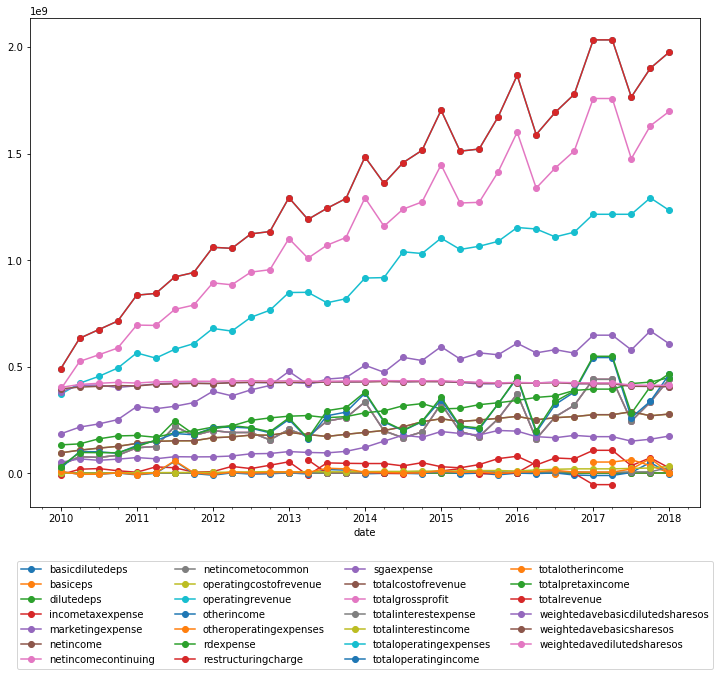

In [23]:
ticker = 'VMW'
fig,ax = plt.subplots(figsize=(12,9))
df_t = get_df(ticker)
df_t.query("statement=='income_statement'").pivot_table('value','date','tag').plot(ax=ax, marker='o')
ax.legend(loc=9, bbox_to_anchor=(.5,-.1), ncol=4)